<h1><center><font size=10 color="green">Project 7 - Bank Churn Prediction</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

<h1><b><font size=3>Objective</font></b></h1>

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

<h1><b><font size=3>Data Dictionary</font></b></h1>

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer 

* CreditScore: It defines the credit history of the customer.  

* Geography: A customer’s location    

* Gender: It defines the Gender of the customer   

* Age: Age of the customer     

* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

    0=No ( Customer did not leave the bank )

    1=Yes ( Customer left the bank )

# 2. Frame Problem

Key information from the problem statement - 
1. To understand which aspects of the service influence a customer's decision to leave Bank's services
2. Predict customers that will potentially churn
3. Concentrate efforts on the improvement of service in the aspects that are important for customers' decision
4. Concentrate on customers that can potentially leave

Towards that, the expectation is to neural network-based binary classifier that can determine whether customer will leave or not in the next 6 months.

Dependent feature in this case is the field - Exited and labels are available as well.

We will create below models to create customer segments -

<b><font color="blue"> Artificial Neural Network (ANN)

# 3. Identify Model Evaluation Metrics

Bank wants to identify as many customers as possible that are at the risk of exiting.

For the Classification confusion matrix, there are 2 types of errors possible - 

Type I - False Positives. Model predicts that customer will leave(Exited = 1), but customer actually does not. This will waste Bank's resources in marketing activities (reaching out the customer, sending mail etc.). As mentioned in the problem statement, bank wants to concentrate efforts on potential customers with high probability of leaving. Hence, minimizing false positives is important.

Type II - False Negatives. Model predicts that customer will NOT leave, but customer actually does. This will be a potential opportunity loss. Obviously, bank wants to minimize this opportunity loss as well. From bank's business perspective, this is important as well.

Possible metrics are -

Accuracy: Accuracy is calculated as the total number of two correct predictions (TP + TN) divided by the total number of a dataset (P + N).
      
      ACC = TP + TN / ( TP+TN+FP+FN)

Precision: Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).
      
      PREC = TP / (TP + FP)

Recall: Recall or Sensitivity or True Positive Rate (TPR)  is calculated as the number of correct positive predictions (TP) divided by the total number of positives (P).
      
      Recall = TP / (TP + FN)

F1-Score: Harmonic mean of precision and recall. It takes both false positive and false negatives into account. F1 score gives the same weightage to recall and precision. Therefore, it performs well on an imbalanced dataset.
      
      F1 = 2 * (PREC * RECALL) / (PREC + RECALL)

<b><font color="blue">Primary Metric(F1-Score)</b></font> - We will want to minimize both the errors, to strike a balance between Recall and Precision. Hence we will use F1-Score as our primary metric. Better F1-Score will ensure that both False Positives as well as False Negatives are minimized. 

Other Metrics - For reference, we will still report Accuracy, Recall and Precsion as well.

# 4. Reusable Custom Functions

In [ ]:
# Function to create confusion matrix for TEST
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# # Function to calculate recall score
# def get_recall_score(model):
#     '''
#     model : classifier to predict values of X

#     '''
#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)
#     print("Recall on TRAIN set : ",metrics.recall_score(y_train,pred_train))
#     print("Recall on TEST set : ",metrics.recall_score(y_test,pred_test))

In [ ]:
# # Function to calculate accuracy score
# def get_accuracy_score(model):
#     '''
#     model : classifier to predict values of X

#     '''
#     #pred_train = model.predict(X_train)
#     #pred_test = model.predict(X_test)
#     print('Accuracy on TRAIN set:' , model.score(X_train, y_train))
#     print('Accuracy on TEST set:' , model.score(X_test, y_test))

In [ ]:
# # Function to calculate f1 score
# def get_f1_score(model):
#     '''
#     model : classifier to predict values of X

#     '''
#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)
#     print("F1 on TRAIN set : ",metrics.f1_score(y_train,pred_train))
#     print("F1 on TEST set : ",metrics.f1_score(y_test,pred_test))

In [ ]:
# ##  Function to calculate precision score
# def get_precision_score(model):
#     '''
#     model : classifier to predict values of X

#     '''
#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)
#     print("Precision on TRAIN set : ",metrics.precision_score(y_train,pred_train))
#     print("Precision on TEST set : ",metrics.precision_score(y_test,pred_test))

In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    #pred_prob = model.predict_proba(predictors)[:, 1]
    pred_prob = model.predict(predictors)
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    #pred_prob = model.predict_proba(predictors)[:, 1]
    pred_prob = model.predict(predictors)
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


# 5. Import Required libraries

In [ ]:
# Install Tensorflow

!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Install Keras Tuner

!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# # To split the data into train and test
from sklearn.model_selection import train_test_split

# # To build linear regression_model
# #from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from scipy.stats import zscore

# # For boxcox
from scipy.stats import boxcox 
from sklearn.preprocessing import PowerTransformer

# # To build Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# # To build Logistic Regression
# from sklearn.linear_model import LogisticRegression

# # For Decision Tree Hyperparameter Tuning, Pre-pruning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Import Metrics
from sklearn import metrics

# # To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    r2_score
)

# # For Ensemble Techniques

# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# #To install xgboost library use - !pip install xgboost 
# from xgboost import XGBClassifier

# # Importing Simple Imputer to treat the null values
from sklearn.impute import SimpleImputer

# # for imbalanced data, to undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# # to create k folds of data and get cross validation score
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.model_selection import cross_val_score

# # To do one-hot encoding
# from sklearn.preprocessing import OneHotEncoder

# # To be used for creating pipelines and personalizing them
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

# For Clustering,to compute distances
# from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
# from sklearn.decomposition import PCA

# importing different functions to build Neural Network models

import tensorflow as tf
import keras_tuner as keras_tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch


In [ ]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 6. Import Dataset

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the dataset as-is
# Created a copy of the dataset so that original dataset is retained as-is for reference in case needed

#This line was used with Google Colab
df=pd.read_csv('/content/drive/My Drive/AI-ML/Module7_NeuralNetworks/Project-7/Churn.csv')

df_orig_copy=df.copy()

In [ ]:
 # Review sample 10 rows to confrm that data is loaded correctly 
df.sample(10, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.0000,2,1,1,97057.2800,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.9500,1,1,0,66526.0100,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.0000,2,0,1,90537.4700,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.3000,2,0,1,1561.5800,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.0500,1,1,1,176692.6500,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.4000,2,1,1,197582.7900,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.9700,1,1,0,84487.6200,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.8600,1,1,1,57992.4900,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.5000,1,1,1,46172.4700,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.4200,2,1,1,51695.4100,0


In [ ]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.0000,2,1,0,96270.6400,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.6100,1,1,1,101699.7700,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.0000,1,0,1,42085.5800,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.3100,2,1,0,92888.5200,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.7900,1,1,0,38190.7800,0


Dataset is imported successfully.

# 7. Perform Basic Data Checks

Basic data checks are done on the dataset. 
This includes - 

1. Check number of rows and columns
2. Check data types
3. Duplicate records
4. Missing value counts
5. Statisitcal summary

In [ ]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 10000 
 Columns: 14


In [ ]:
# Check for duplicate rows

df.duplicated().sum()

0

No duplicate records.

In [ ]:
# Check basic structure of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [ ]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
df.select_dtypes(include='int').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

In [ ]:
df.select_dtypes(include='float').columns

Index(['Balance', 'EstimatedSalary'], dtype='object')

Data types - 

* Numeric Features (Integer) - ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

* Numeric Features (Float) - ['Balance', 'EstimatedSalary']

* Object Features - ['Surname', 'Geography', 'Gender']

In [ ]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are NO missing values for any features.

In [ ]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000,10000.0000,10000,10000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.5000,15690940.5694,NaN,650.5288,NaN,NaN,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,2886.8957,71936.1861,NaN,96.6533,NaN,NaN,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,1.0000,15565701.0000,NaN,350.0000,NaN,NaN,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,2500.7500,15628528.2500,NaN,584.0000,NaN,NaN,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,5000.5000,15690738.0000,NaN,652.0000,NaN,NaN,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,7500.2500,15753233.7500,NaN,718.0000,NaN,NaN,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000


In [ ]:
# Check Unique values for int columns

for column in df.select_dtypes(include='int').columns:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print(f'For {column}, Values are \n {df[column].value_counts()} \n')
     print("-" * 50)

For RowNumber, there are 10000 values in the main dataset 

For RowNumber, Values are 
 1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64 

--------------------------------------------------
For CustomerId, there are 10000 values in the main dataset 

For CustomerId, Values are 
 15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64 

--------------------------------------------------
For CreditScore, there are 460 values in the main dataset 

For CreditScore, Values are 
 850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64 

--------------------------------------------------
For Age, there are 70 values in the main 

Unbalanced Dataset - Exited is the target dependent feature. Two classes for this feature have a ratio of 80:20, so the dataset is unbalanced. 

In [ ]:
# Check Unique values for object columns

for column in df.select_dtypes(include='object').columns:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print(f'For {column}, there are {df[column].value_counts()} values in the main dataset \n')
     print("-" * 50)

For Surname, there are 2932 values in the main dataset 

For Surname, there are Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64 values in the main dataset 

--------------------------------------------------
For Geography, there are 3 values in the main dataset 

For Geography, there are France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 values in the main dataset 

--------------------------------------------------
For Gender, there are 2 values in the main dataset 

For Gender, there are Male      5457
Female    4543
Name: Gender, dtype: int64 values in the main dataset 

--------------------------------------------------


In [ ]:
# Drop features that will not add value to the model
# As RowNumber and Customer Key are unique identifiers for each record, it will not help train model
# Surname field also should not be part of the model training

df.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


Observations on the dataset

1. Dataset has 10000 rows and 14 features

2. No duplicate rows seen

3. No missing fields

4. Data types - 

  * Numeric Features (Integer) - ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

  * Numeric Features (Float) - ['Balance', 'EstimatedSalary']

  * Object Features - ['Surname', 'Geography', 'Gender']

5. Features 
  
  * RowNumber - Unique identifier for the record

  * CustomerId - Unique ID which is assigned to each customer

  * Surname - Not really relevant for EDA or model training. 'Smith' is the most popular surname

  * CreditScore - Range is from 350 to 850, with median score of 652

  * Geography - There are only 3 values, France being the most popular, Germany and Spain are the other two
 
  * Gender - Male and Female values are more or less even

  * Age - Min age is 18 and max is 92. 75% of the customers are less than 44
  
  * Tenure - Range is from 0 to 10. Some customers have joined the bank less than year before. 

  * Balance - There are customers with 0 balance. Range is high with max value being around 250k. Only 25% customers have more balance than $127k

  * NumOfProducts - 4 distinct values, most of the customers have 1 or 2 products

  * HasCrCard - 2 distinct values, Most of the customers have credit card

  * IsActiveMember - 2 distinct values. Records are evenly split between active and inactive customers

  * EstimatedSalary - Range is from 11 to about 200K. We will check how many records with 11 or such smaller numbers. These obviously are incorrect values. We may treat them.

  * Exited - This is a dependent features having 2 values. 80% of the records are for the customers that are still with the bank


# 8. Perform Exploratory Data Analysis (EDA)

Purpose of this analysis is find more details about individual features and its characteristics. 

Analysis includes - 
1. Checking the distribution and Univariate analysis
2. Multivariate analysis
3. Note observations / insights

## 8a. EDA - Univariate Analysis

Purpose of this analysis is find more details about individual feature and its characteristics

### 8a.1. CreditScore

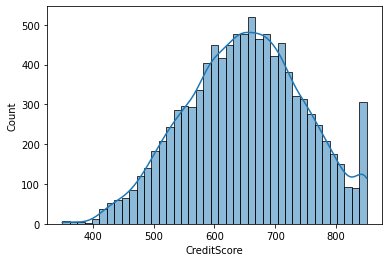

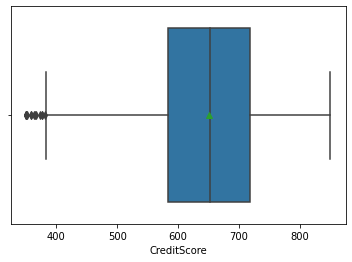

In [ ]:
# Use histplots to see distribution for CreditScore 

sns.histplot(data=df,x='CreditScore', kde=True)
plt.show()

sns.boxplot(data=df,x='CreditScore', showmeans=True)
plt.show()

* Little tail on the left side, minor Left skewed distribution
* Lower outiers exist that need to be investigated, no upper outliers

### 8a.2. Geography

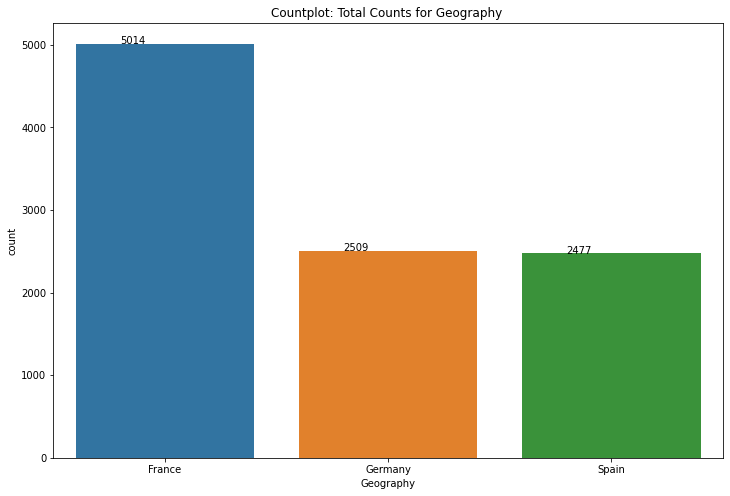

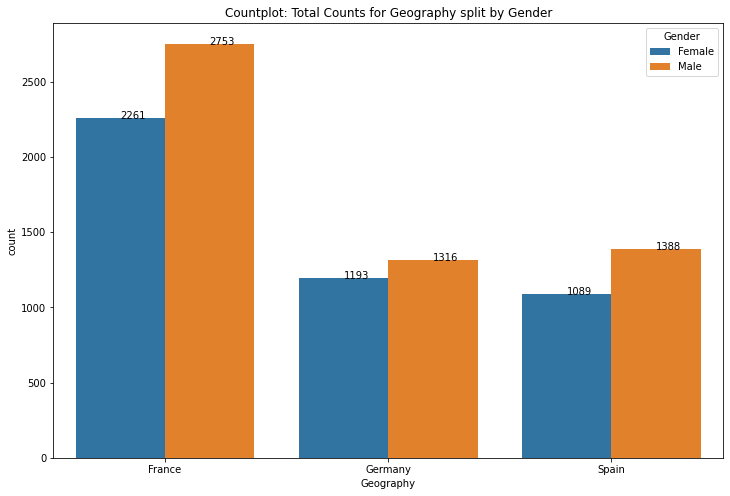

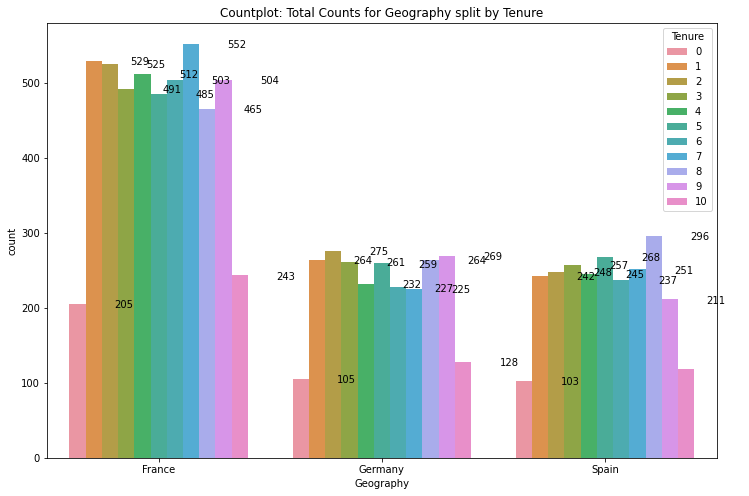

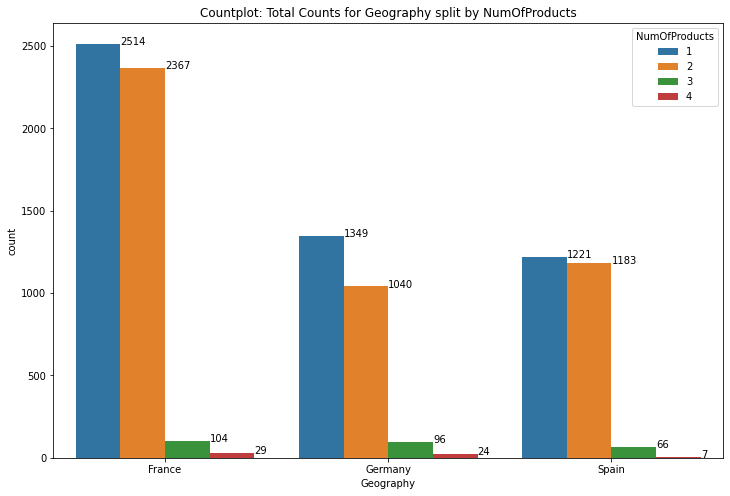

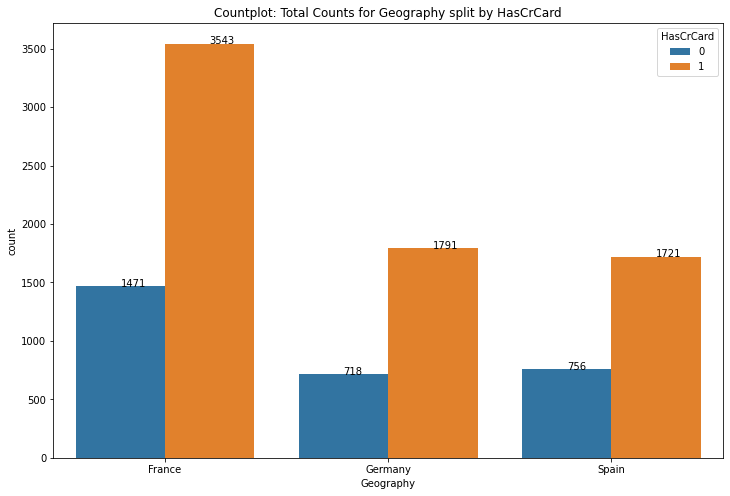

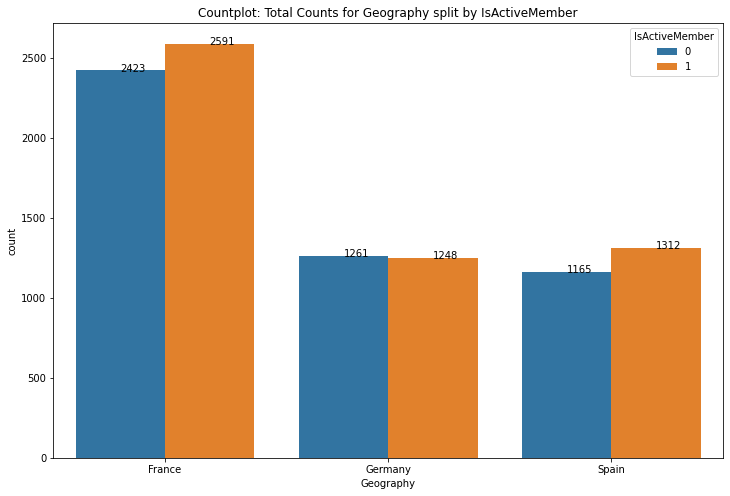

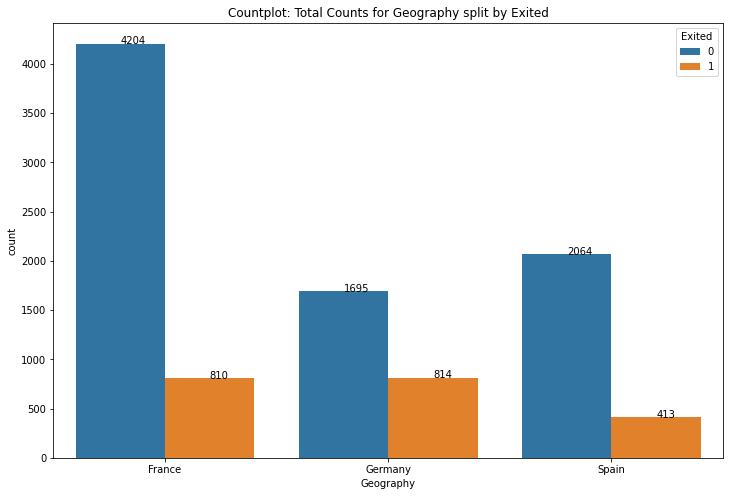

In [ ]:
# Use Countplot to see the distribution of Geography.

Temp_v='Geography'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Tenure')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Tenure', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumOfProducts')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumOfProducts', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by HasCrCard')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'HasCrCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by IsActiveMember')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'IsActiveMember', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Exited')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Exited', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* France is the geography with most number of records, followed by more or less same number of records for Germany and Spain
* Similar proportion of males and females in all geographies
* Similar proportion of different tenures in all geographies
* 1 & 2 number of products are most prevalent in all geographies
* Not much difference for HasCrCard, IsActiveMember features in all geographies
* Disproportionate number of customers have exited from France and Spain, as compared to Germany. For example, for Germany ratio of exited vs non-exited is approximately 2, but for France & Spain, its approximatey 5

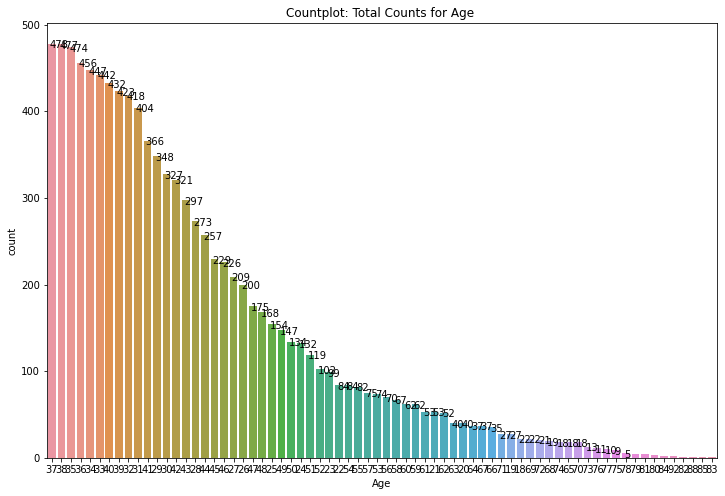

In [ ]:
# Use Countplot to see the distribution of Age.

Temp_v='Age'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Multi-modal distribution, with modes on 4 & 6
* No outliers
* 50% of the customers have between 3 & 6 credit cards, median number of credit cards is 5

### 8a.3. Gender

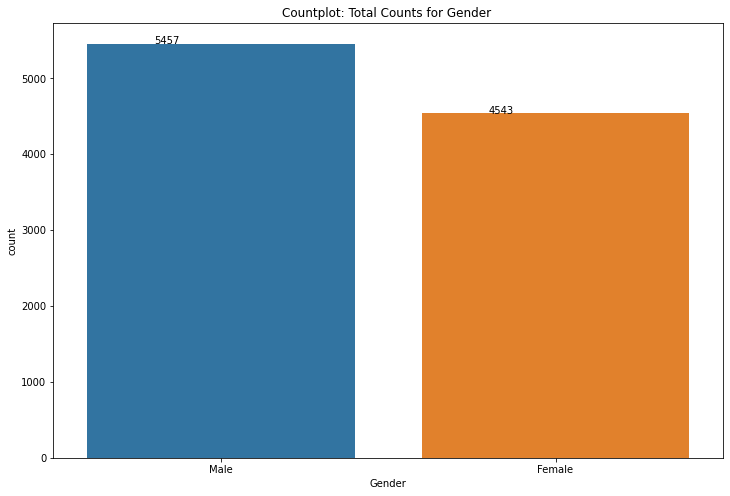

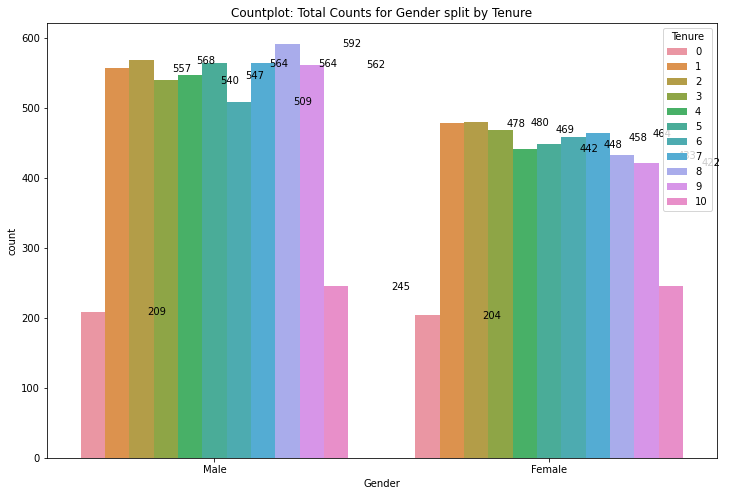

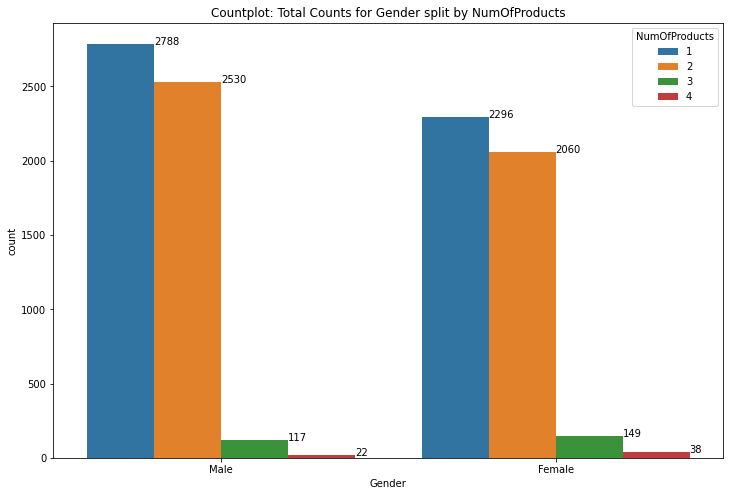

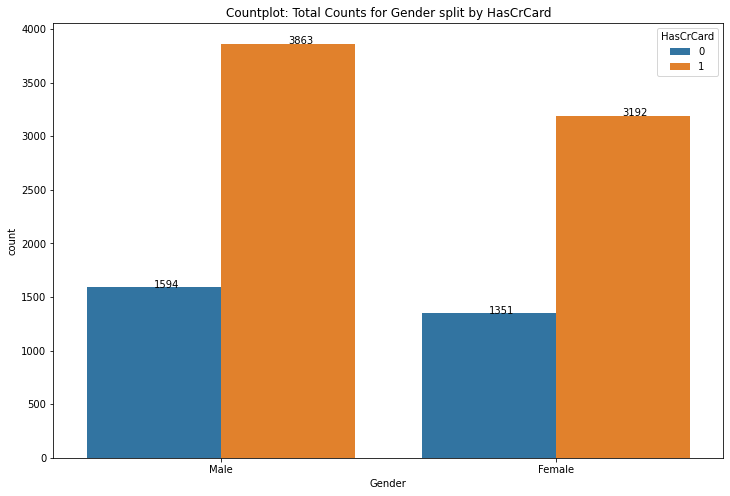

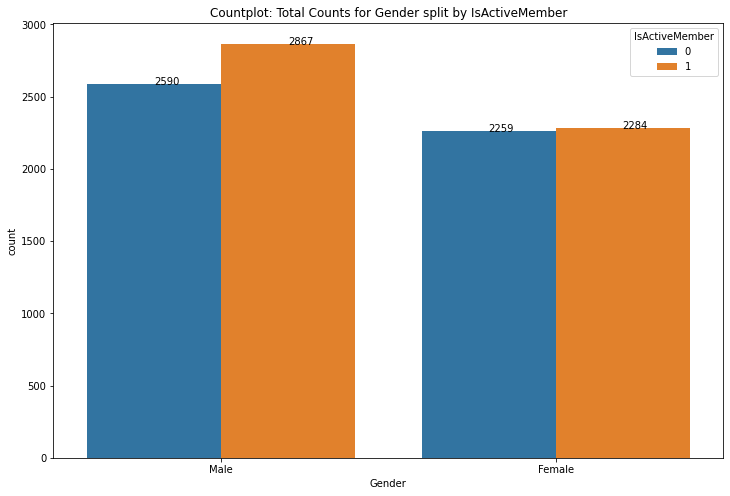

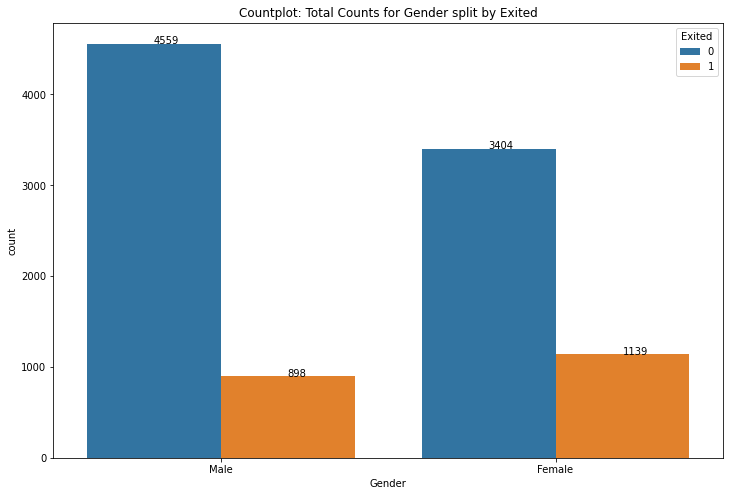

In [ ]:
# Use Countplot to see the distribution of Gender.

Temp_v='Gender'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Tenure')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Tenure', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumOfProducts')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumOfProducts', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by HasCrCard')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'HasCrCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by IsActiveMember')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'IsActiveMember', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Exited')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Exited', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Not much difference on any of the features for males and females, distribution is similar irrespective of the gender

### 8a.4. Age

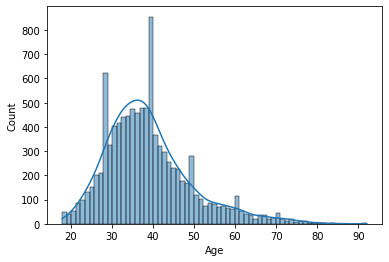

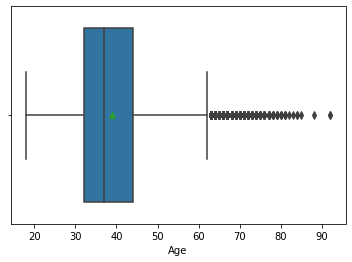

In [ ]:
# Use histplots to see distribution for Age

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age', showmeans=True)
plt.show()

* Right skewed distribution
* Several outliers on the upper side of the Age, but mainly younger customers in 40s or younger

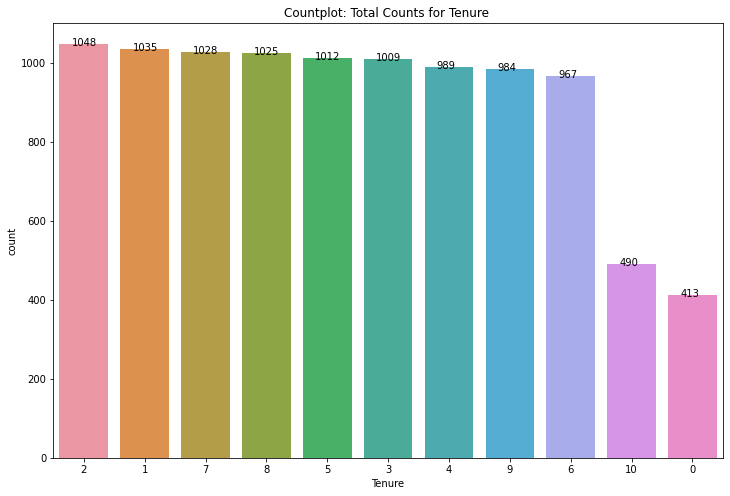

In [ ]:
# Use Countplot to see the distribution of Tenure.

Temp_v='Tenure'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Right skewed distribution
* Majority of the customers visit online <= 5 times
* There are some outliers as customers have visited more than 8 times. However, considering that these are number of online visits in an year, even maximum number of 15 seems legit.

### 8a.5. Tenure

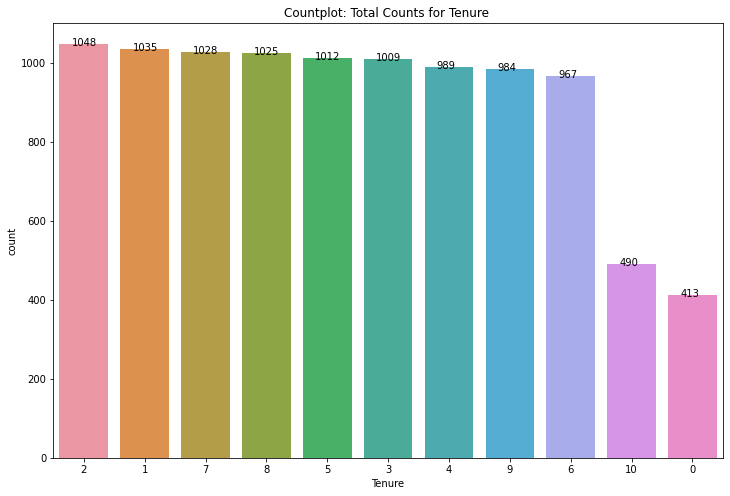

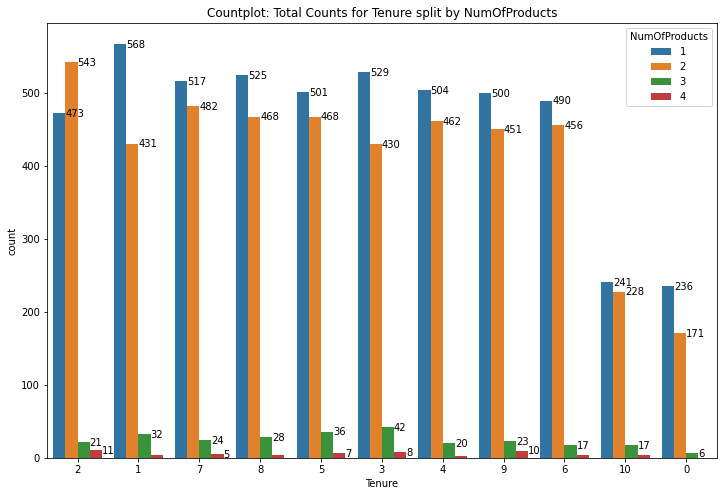

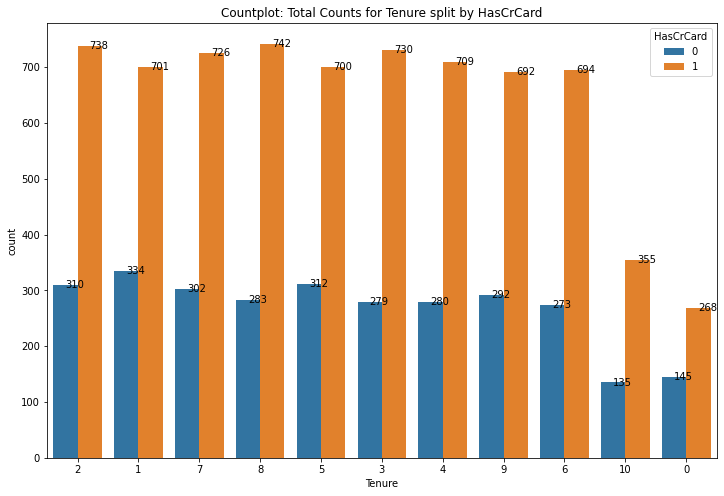

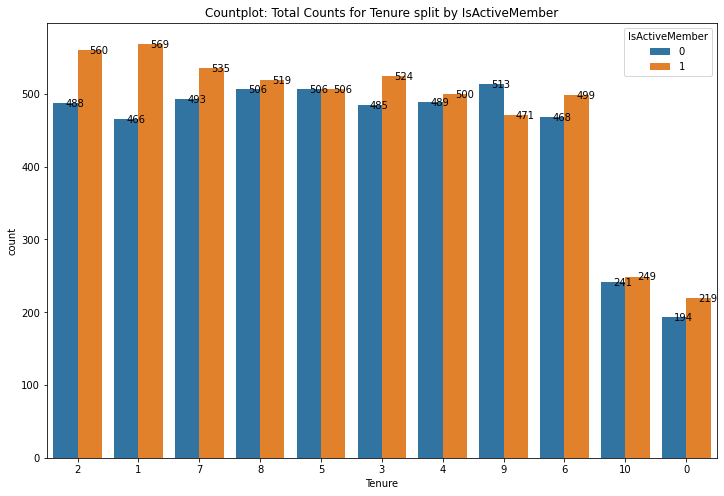

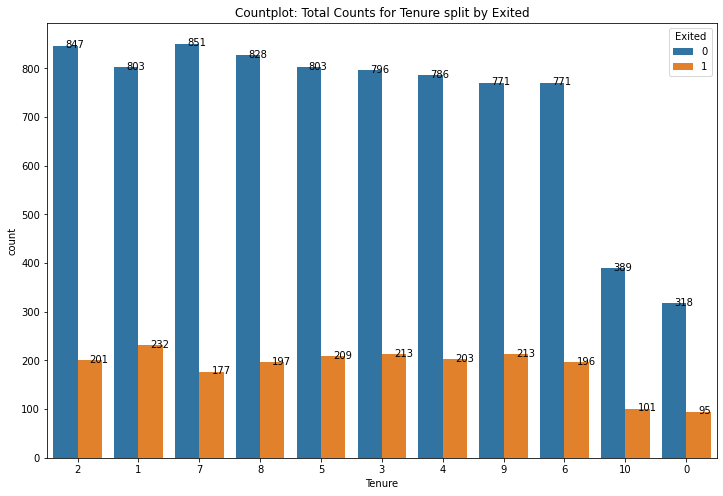

In [ ]:
# Use Countplot to see the distribution of Tenure.

Temp_v='Tenure'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumOfProducts')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumOfProducts', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by HasCrCard')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'HasCrCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by IsActiveMember')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'IsActiveMember', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Exited')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Exited', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

* Similar number of customers with tenure between 2 to 9. Smaller number of customers with 10 & 0 (<1) years tenure
* Within customers with 2 years tenture, more seem to use 2 products. For all other tenures, number of customers using 1 product is more than number of customers using 2 products
* Most customers in all tenures have credit cards and are active
*  More proportion of customers with tenures 0 and 10 have exited

### 8a.6. Balance

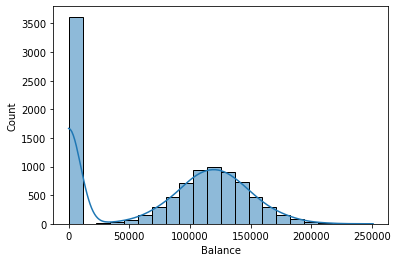

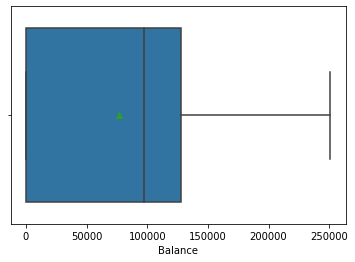

In [ ]:
# Use histplots to see distribution for Balance 

sns.histplot(data=df,x='Balance', kde=True)
plt.show()

sns.boxplot(data=df,x='Balance', showmeans=True)
plt.show()

In [ ]:
df[df['Balance']==0.0000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
6,822,France,Male,50,7,0.0000,2,1,1,10062.8000,0
11,497,Spain,Male,24,3,0.0000,2,1,0,76390.0100,0
12,476,France,Female,34,10,0.0000,2,1,0,26260.9800,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0000,2,1,1,179436.6000,0
9992,726,Spain,Male,36,2,0.0000,1,1,0,195192.4000,0
9994,800,France,Female,29,2,0.0000,2,0,0,167773.5500,0
9995,771,France,Male,39,5,0.0000,2,1,0,96270.6400,0


* Over 3600 customers with 0 balance. Not sure if this is correct that these customers have no account balance. Many customers have high salaries. In real case, we will check with business / SME / source of the data and ensure that the data indeed is crrect. For this exercise, we will treat this by imputing mean values.
* No outliers

### 8a.7. NumOfProducts

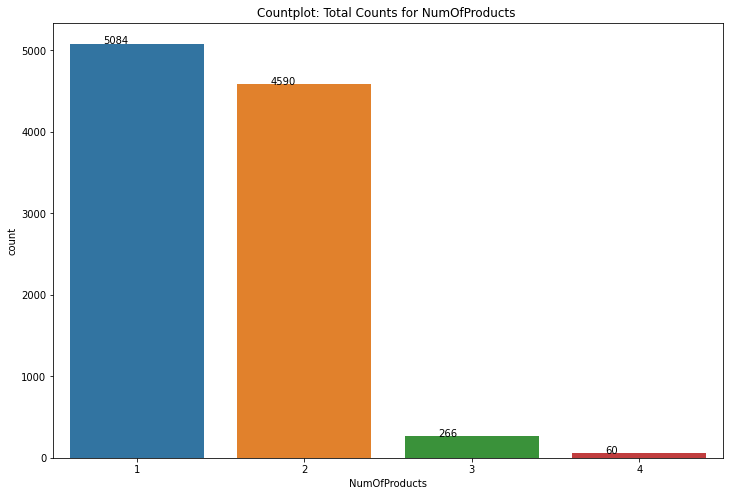

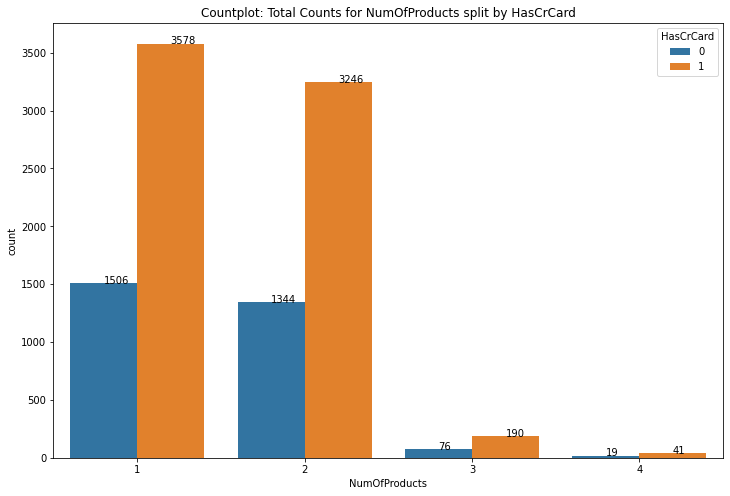

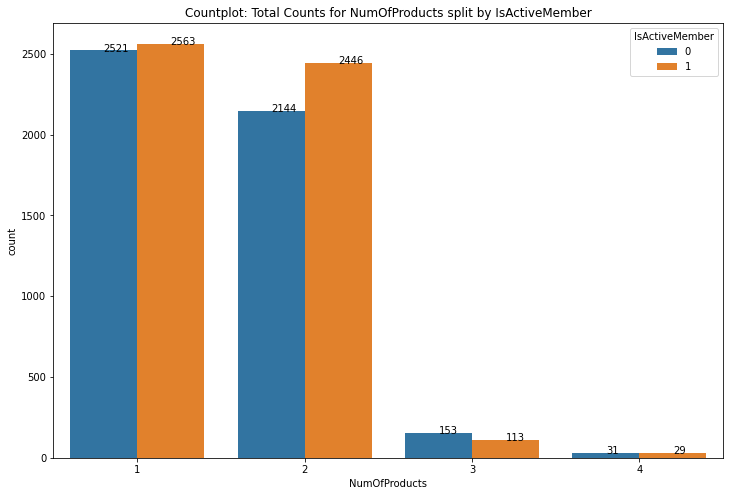

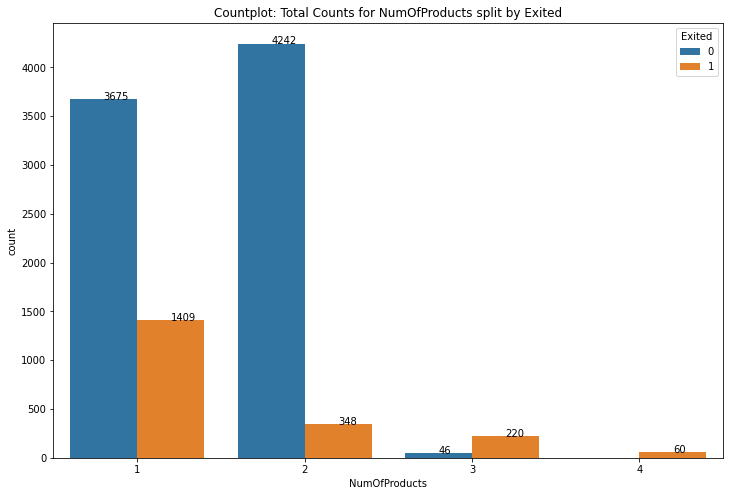

In [ ]:
# Use Countplot to see the distribution of NumOfProducts.

Temp_v='NumOfProducts'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by HasCrCard')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'HasCrCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by IsActiveMember')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'IsActiveMember', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Exited')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Exited', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Most customers use 1 or 2 products
* Majority of the customer who have exited had 1 number of prouct
* Customers using 3 products have large proportion who have exited. All that used 4 products have exited as well

### 8a.8. HasCrCard

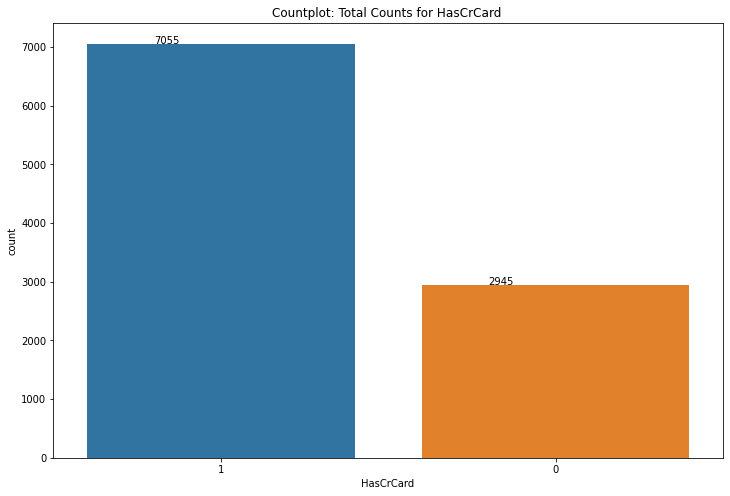

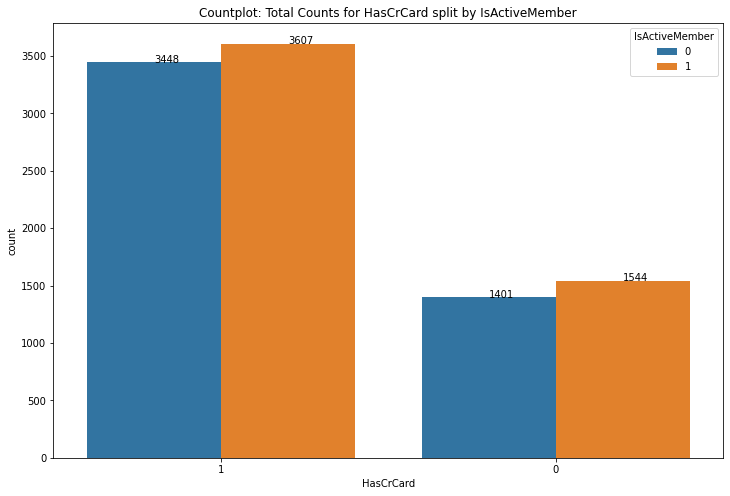

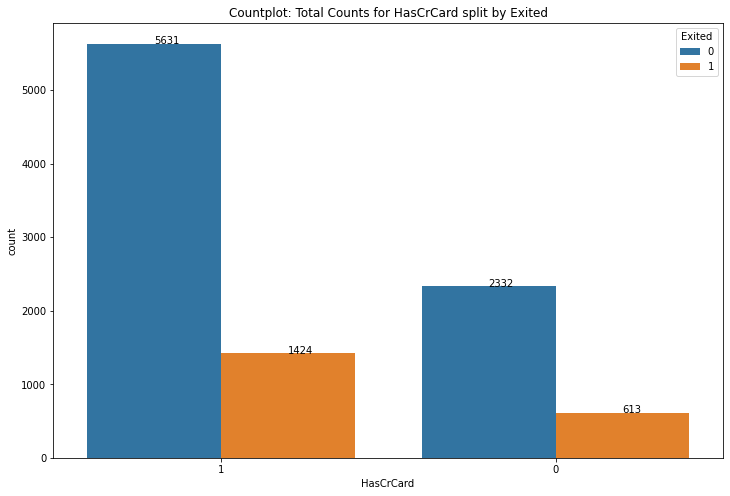

In [ ]:
# Use Countplot to see the distribution of HasCrCard.

Temp_v='HasCrCard'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by IsActiveMember')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'IsActiveMember', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Exited')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Exited', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Nothing specific to note here

### 8a.9. IsActiveMember

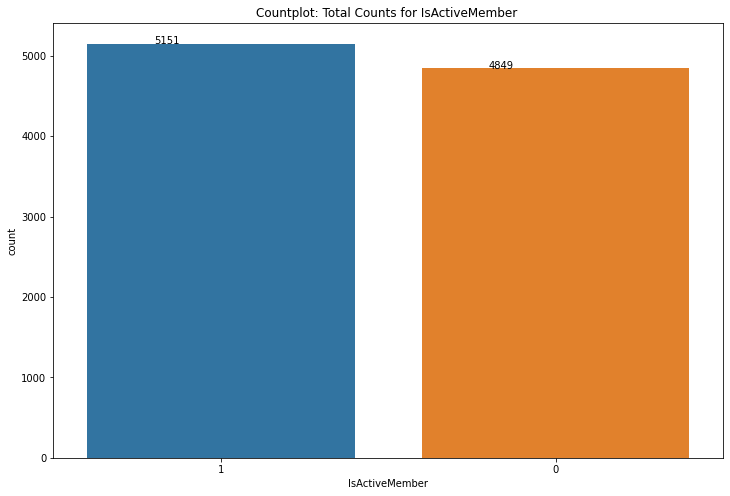

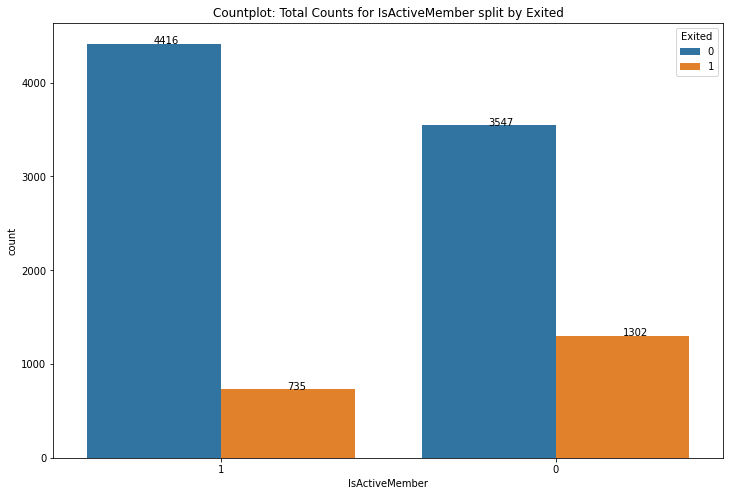

In [ ]:
# Use Countplot to see the distribution of IsActiveMember.

Temp_v='IsActiveMember'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Exited')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Exited', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


* Nothing specific to note here

### 8a.10. EstimatedSalary

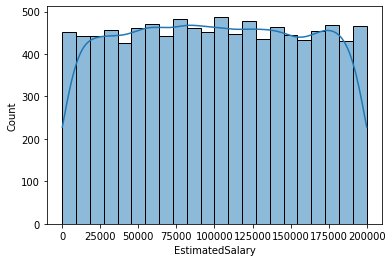

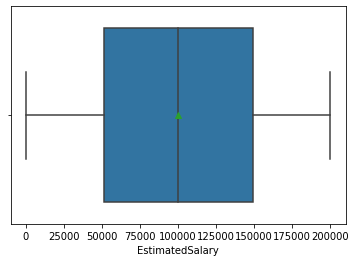

In [ ]:
# Use histplots to see distribution for EstimatedSalary 

sns.histplot(data=df,x='EstimatedSalary', kde=True)
plt.show()

sns.boxplot(data=df,x='EstimatedSalary', showmeans=True)
plt.show()

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


In [ ]:
df[df['EstimatedSalary'] < 10000].count()

CreditScore        508
Geography          508
Gender             508
Age                508
Tenure             508
Balance            508
NumOfProducts      508
HasCrCard          508
IsActiveMember     508
EstimatedSalary    508
Exited             508
dtype: int64

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000,10000.0000
mean,650.5288,38.9218,5.0128,76485.8893,1.5302,0.7055,0.5151,100090.2399,0.2037
std,96.6533,10.4878,2.8922,62397.4052,0.5817,0.4558,0.4998,57510.4928,0.4028
min,350.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11.5800,0.0000
25%,584.0000,32.0000,3.0000,0.0000,1.0000,0.0000,0.0000,51002.1100,0.0000
50%,652.0000,37.0000,5.0000,97198.5400,1.0000,1.0000,1.0000,100193.9150,0.0000
75%,718.0000,44.0000,7.0000,127644.2400,2.0000,1.0000,1.0000,149388.2475,0.0000
max,850.0000,92.0000,10.0000,250898.0900,4.0000,1.0000,1.0000,199992.4800,1.0000


* Evenly distributed, with median and mean around 100K
* Mimimum value seems to be around 11, there are 4 records with < 100 salary, 59 records with < 1000 salary. We will decide if to treat these

### 8a.11. Exited

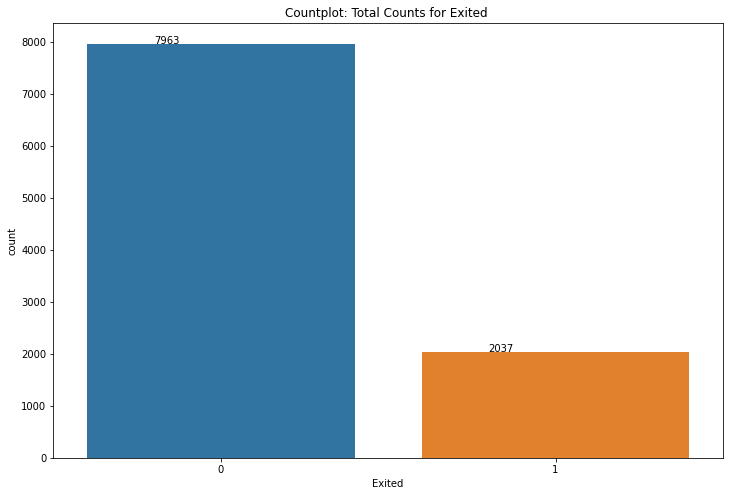

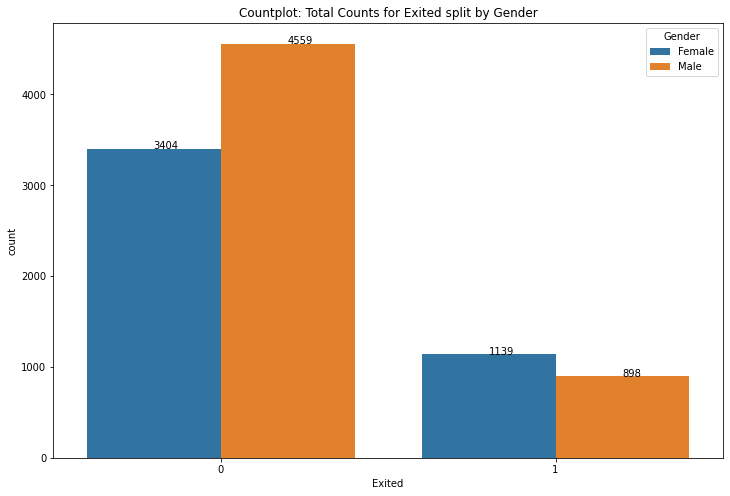

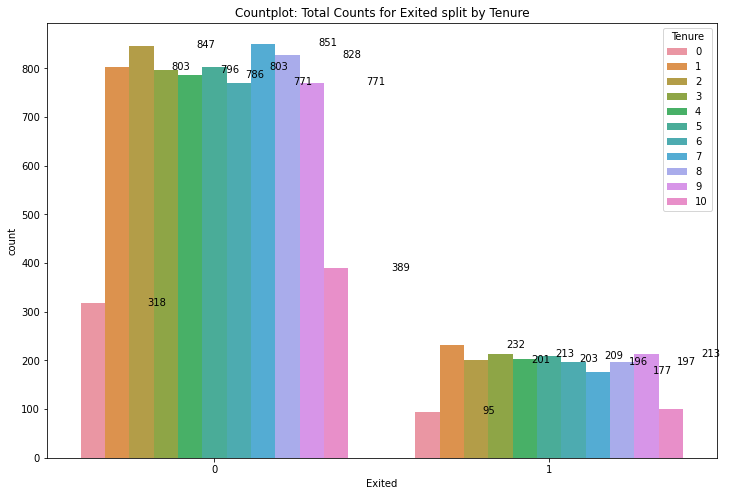

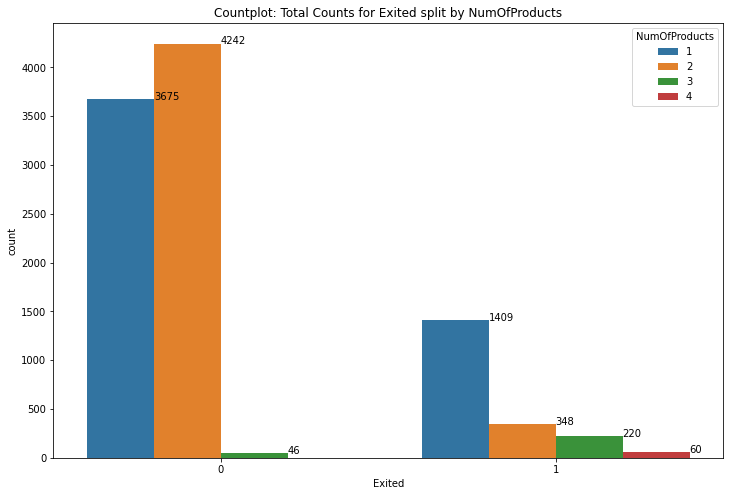

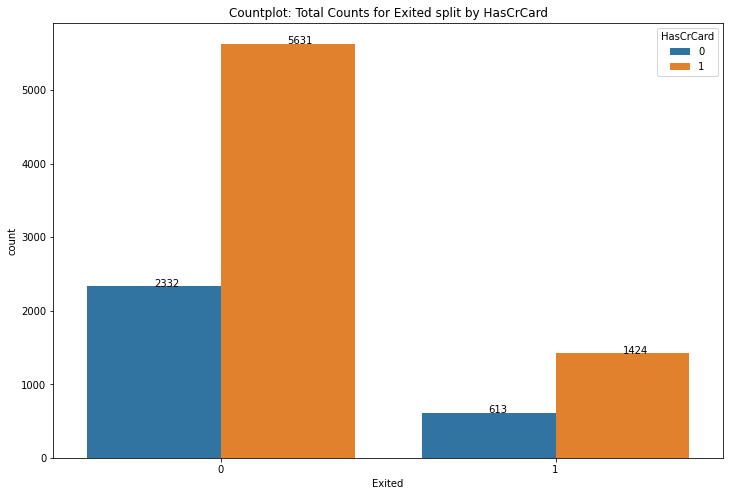

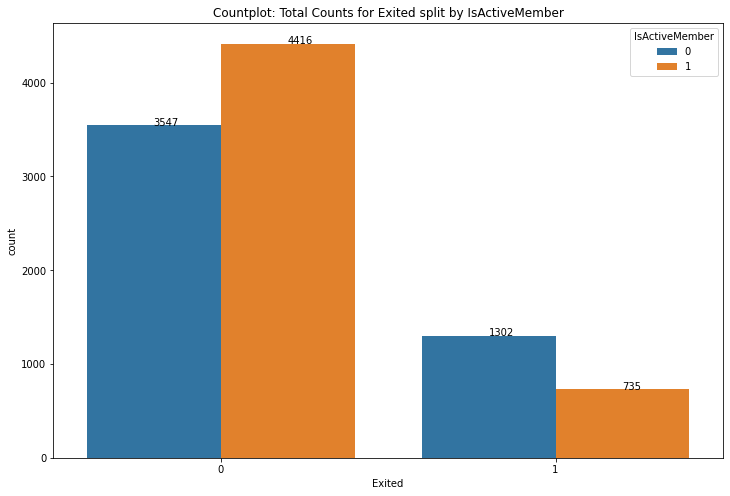

In [ ]:
# Use Countplot to see the distribution of Exited.

Temp_v='Exited'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Gender')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Gender', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Tenure')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Tenure', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by NumOfProducts')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'NumOfProducts', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by HasCrCard')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'HasCrCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by IsActiveMember')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'IsActiveMember', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()



* This is the dependent feature
* About 20% customers have exited
* Of customers who have exited - 
  * Proportion of male customers exiting is more than females
  * Most used 1 number of products
  * Most used credit card
  * Most were NOT active

## 8b. EDA - Multivariate Analysis

Purpose of this analysis is to identify inter relationships between multiple features.

Main focus will be understaning relationships of several features with Price.

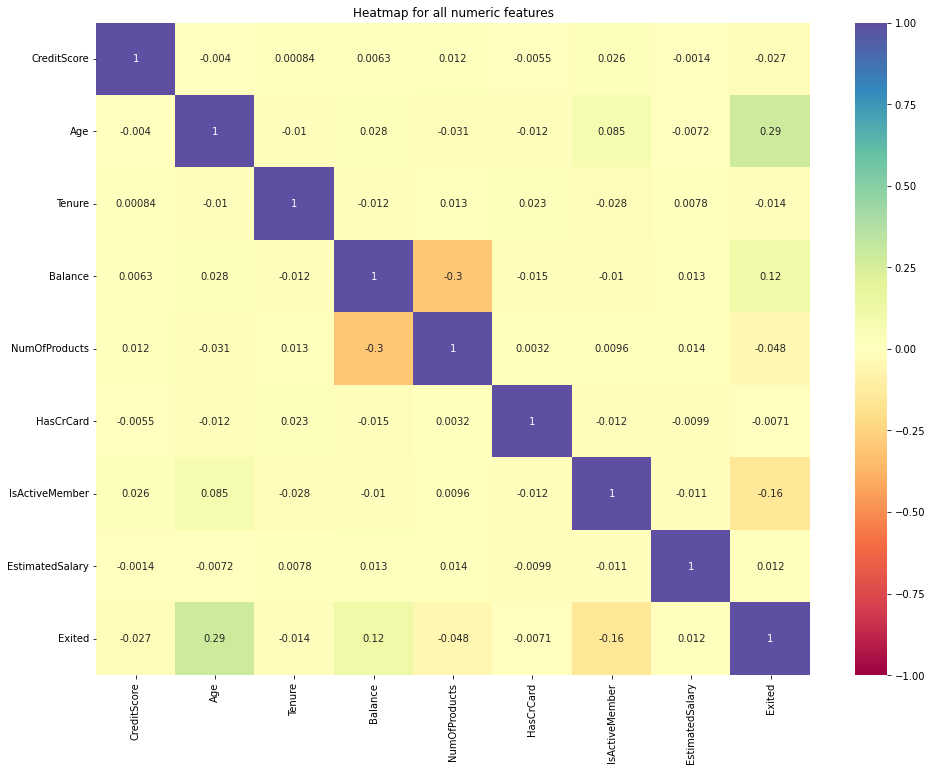

In [ ]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(16,12))
plt.title('Heatmap for all numeric features')

sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

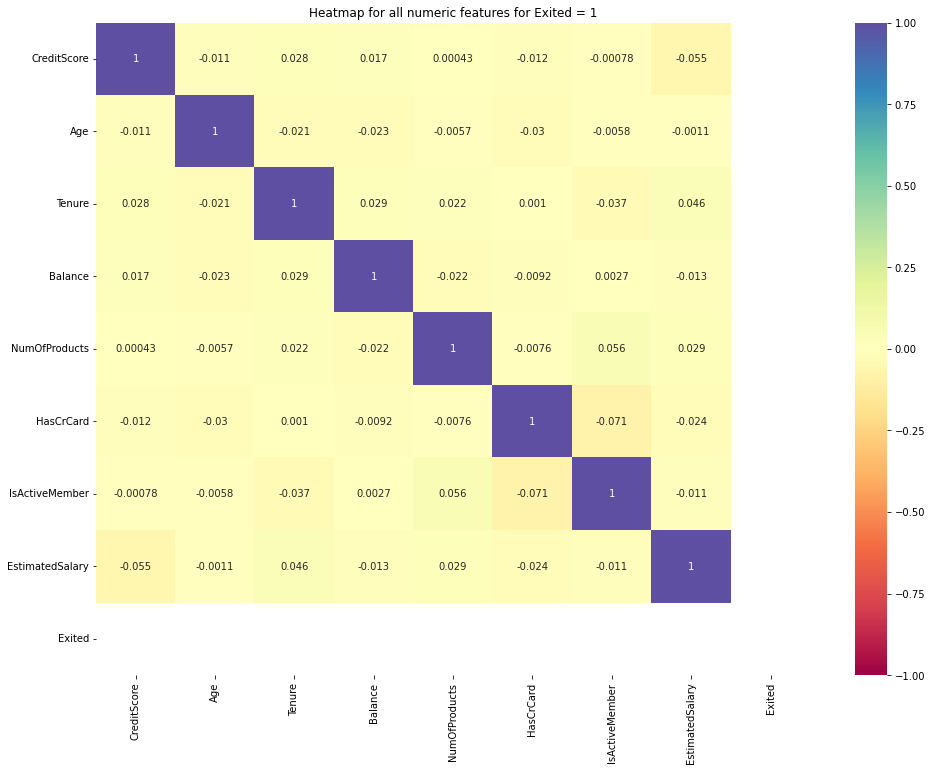

In [ ]:
#Let's start with Heatmap to check relationships between all numeric features for Exited customers

temp_df_exited = df[df['Exited'] == 1]

plt.figure(figsize=(16,12))
plt.title('Heatmap for all numeric features for Exited = 1')

sns.heatmap(temp_df_exited.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

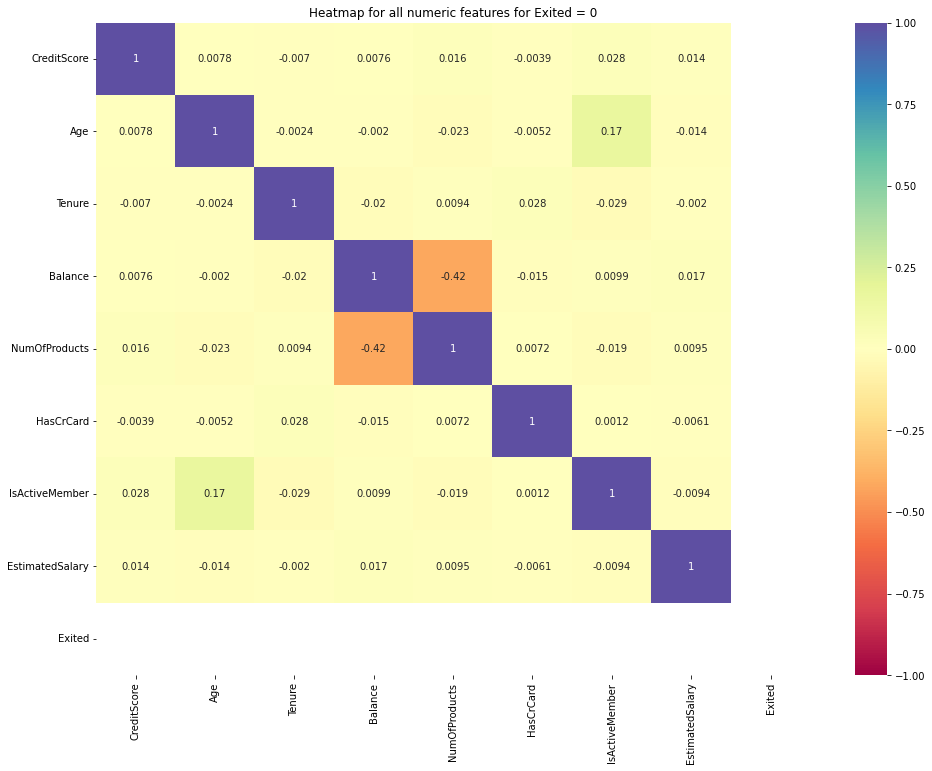

In [ ]:
#Let's start with Heatmap to check relationships between all numeric features for Non-Exited customers

temp_df_non_exited = df[df['Exited'] == 0]

plt.figure(figsize=(16,12))
plt.title('Heatmap for all numeric features for Exited = 0')

sns.heatmap(temp_df_non_exited.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [ ]:
del temp_df_exited
del temp_df_non_exited

Observations

1. No strong corelations (>= 0.7 absolute value) exist between any features.
  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

	a. Balance and NumOfProducts - Negative corelation. More the number of products, lesser the balance

3. No difference in corelations for Exited and Non-Exited customers

4. Looks like independent features do not have inter-dependencies which is good!

Let's check how Exited is related to other numeric features.

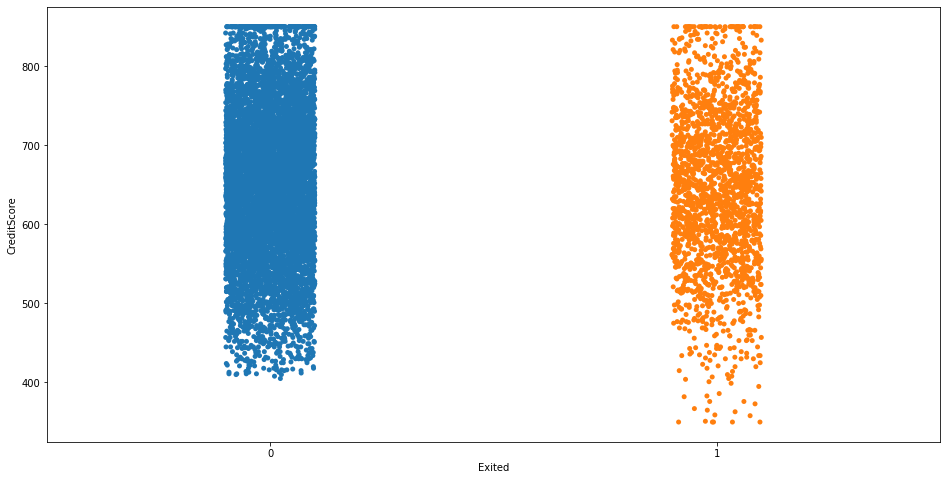

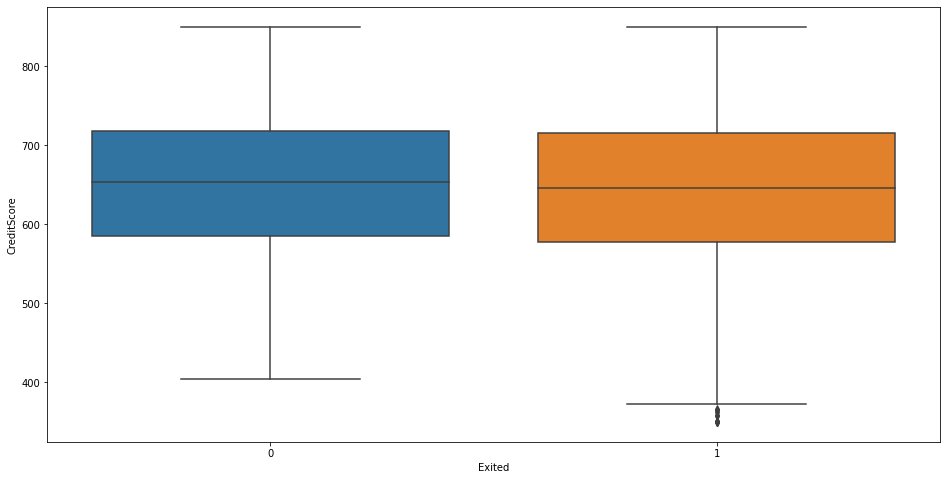

In [ ]:
# Create stripplot for Exited and CreditScore.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Exited', y='CreditScore');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Exited', y='CreditScore')
plt.show()

* Not much difference in the distribution for CreditScore for Non-exited and exited customers. There are some customers with lower credit score that have exited

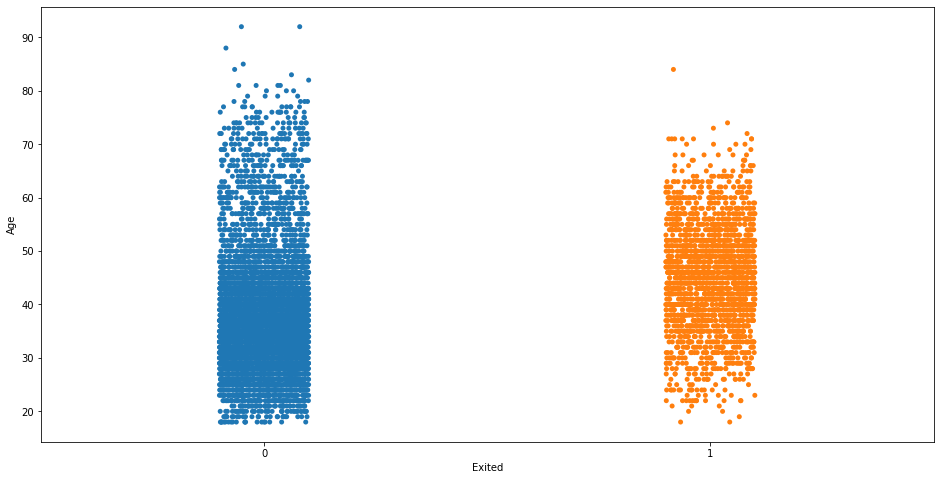

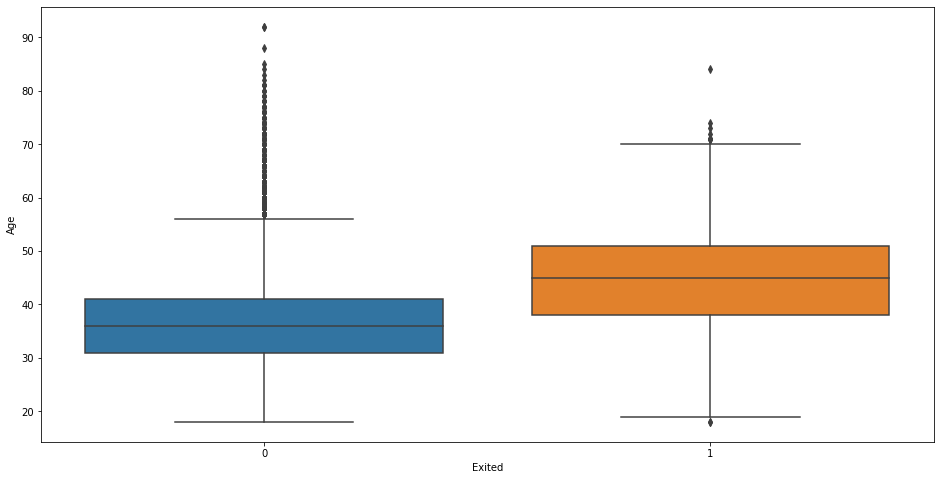

In [ ]:
# Create stripplot for Exited and Age.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Exited', y='Age');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Exited', y='Age')
plt.show()

* Comparatively older customers seem to have exited. Median age of exited customers is around 42/43, whereas median age is around 36 for non-exited customers.

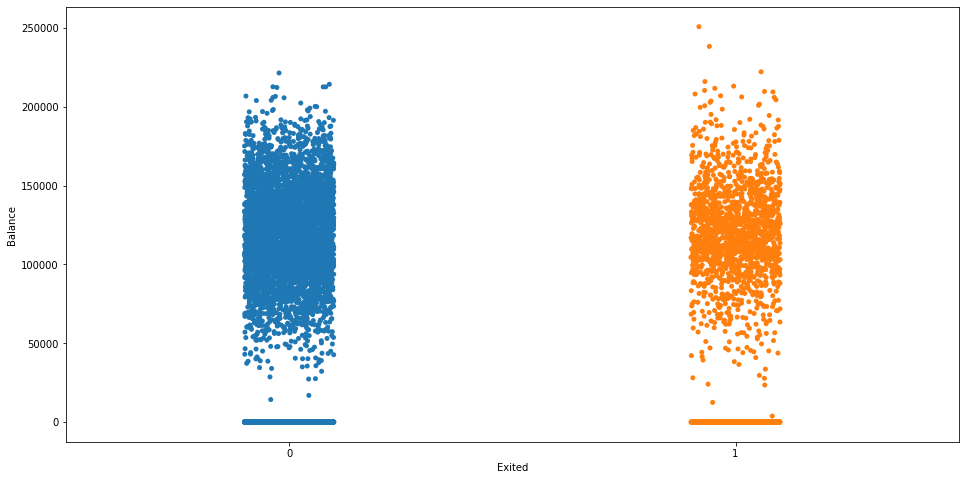

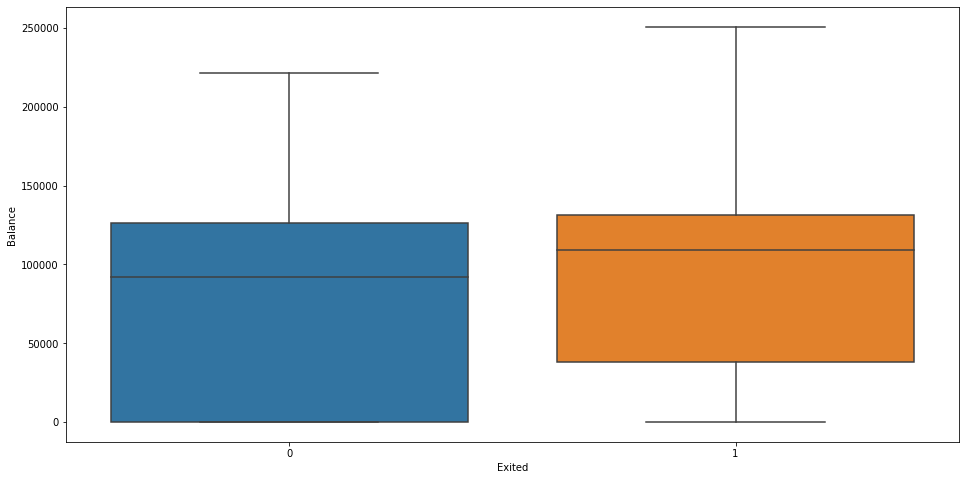

In [ ]:
# Create stripplot for Exited and Balance.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Exited', y='Balance');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Exited', y='Balance')
plt.show()

* Range of balance is more for Exited customers. But median Balance is not very difference between non-exited and exited customers.

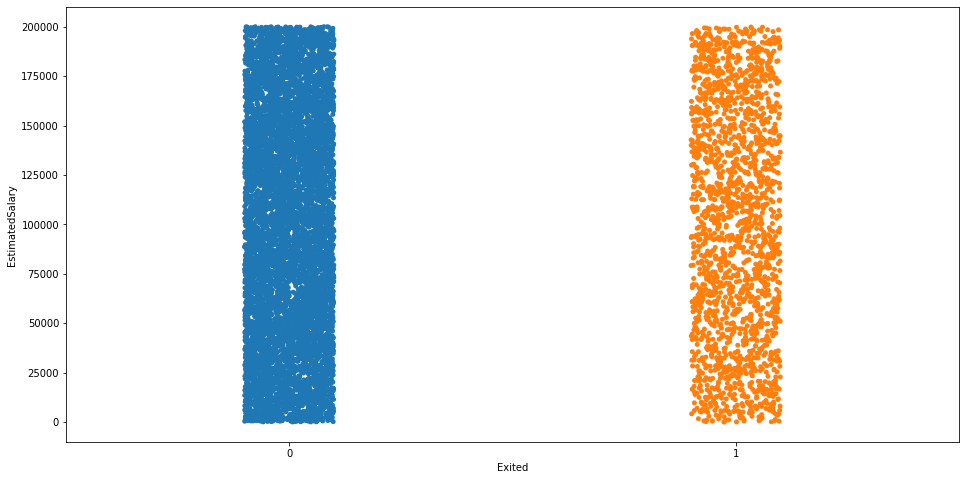

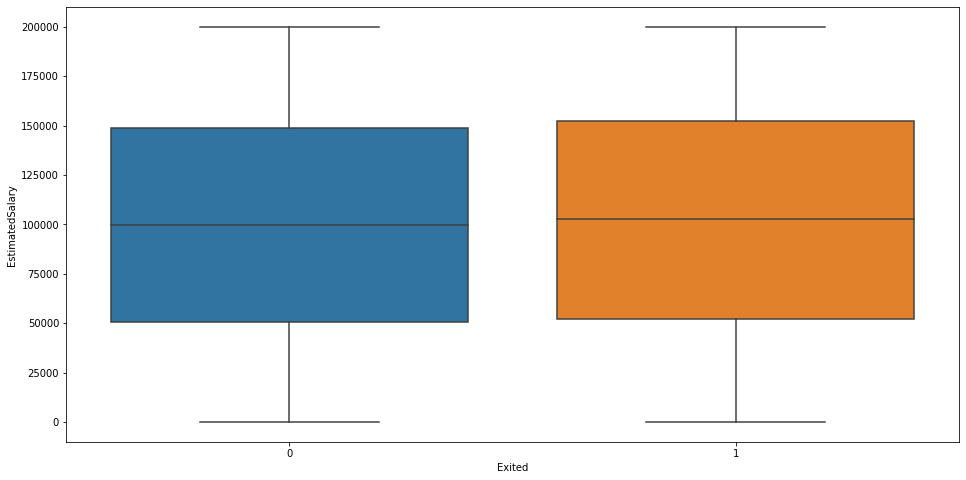

In [ ]:
# Create stripplot for Exited and EstimatedSalary.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Exited', y='EstimatedSalary');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')
plt.show()

* Not much difference in the EstimatedSalary of non-exited and exited customers

## 8c. EDA - Insights Summary

### Univariate Analysis

CreditScore

* Little tail on the left side, minor Left skewed distribution
* Lower outiers exist that need to be investigated, no upper outliers

Geography

* France is the geography with most number of records, followed by more or less same number of records for Germany and Spain
* Similar proportion of males and females in all geographies
* Similar proportion of different tenures in all geographies
* 1 & 2 number of products are most prevalent in all geographies
* Not much difference for HasCrCard, IsActiveMember features in all geographies
* Disproportionate number of customers have exited from France and Spain, as compared to Germany. For example, for Germany ratio of exited vs non-exited is approximately 2, but for France & Spain, its approximatey 5

Gender

* Not much difference on any of the features for males and females, distribution is similar irrespective of the gender

Age

* Right skewed distribution
* Several outliers on the upper side of the Age, but mainly younger customers in 40s or younger

Tenure

* Similar number of customers with tenure between 2 to 9. Smaller number of customers with 10 & 0 (<1) years tenure
* Within customers with 2 years tenture, more seem to use 2 products. For all other tenures, number of customers using 1 product is more than number of customers using 2 products
* Most customers in all tenures have credit cards and are active
*  More proportion of customers with tenures 0 and 10 have exited

Balance

* Over 3600 customers with 0 balance. Not sure if this is correct that these customers have no account balance. We will probably treat this by imputing median values
* No outliers

NumOfProducts

* Most customers use 1 or 2 products
* Majority of the customer who have exited had 1 number of prouct
* Customers using 3 products have large proportion who have exited. All that used 4 products have exited as well

EstimatedSalary

* Evenly distributed, with median and mean around 100K
* Mimimum value seems to be around 11, there are 4 records with < 100 salary, 59 records with < 1000 salary. We will decide if to treat these

Exited

* This is the dependent feature
* About 20% customers have exited
* Of customers who have exited - 
	**Proportion of male customers exiting is more than females
	**Most used 1 number of products
	**Most used credit card
	**Most were NOT active

### Multivariate Analysis


1. No strong corelations (>= 0.7 absolute value) exist between any features.
  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

	a. Balance and NumOfProducts - Negative corelation. More the number of products, lesser the balance

3. No difference in corelations for Exited and Non-Exited customers

4. Looks like independent features do not have inter-dependencies which is good!

5. Not much difference in the distribution for CreditScore for Non-exited and exited customers. There are some customers with lower credit score that have exited

6. Comparatively older customers seem to have exited. Median age of exited customers is around 42/43, whereas median age is around 36 for non-exited customers.

7. Range of balance is more for Exited customers. But median Balance is not very different between non-exited and exited customers.

### Profile of Exited customers
* Male customers are more prone
* Used 1 number of products
* Credit card users
* NOT active
* Older customers



# 8. Prepare TRAIN and TEST datasets

Separate TRAIN and TEST datasets from TOTAL dataset in 80 / 20 proportion. 

TRAIN set will be used for training the models.

TEST set will be treated like Production dataset and performance of the final model will be checked on TEST dataset.

We will use stratify on target feature while splitting the datasets. This will ensure that proportion of both classes will be similar in all datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Let's separate Dependent and Independent features in X and y

In [ ]:
# Separate Dependent and Independent features

# Independant features
#X = df.drop('Exited', axis=1)
X = df.iloc[:,:-1]

# Dependent features
#y = df['Exited']
y =df.iloc[:,-1]

In [ ]:
# Let's separate data for TRAIN and TEST in the prportion of 80/20

# creating temp and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

Check sample records in Train and Test datasets.

In [ ]:
# Check sample records for TRAIN

X_train.sample(10, random_state=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
768,684,Spain,Male,41,2,119782.7200,2,0,0,120284.6700
7938,805,France,Male,39,2,0.0000,1,0,0,166650.3200
8020,850,France,Female,46,2,157866.7700,1,1,1,18986.1200
2113,738,Germany,Male,35,6,101744.8400,1,0,0,85185.4400
3911,782,France,Female,35,4,0.0000,1,1,1,119565.3400
8269,611,France,Female,53,7,0.0000,2,0,1,156495.3900
1531,600,France,Female,28,6,0.0000,2,0,1,52193.2300
2920,696,France,Female,33,4,0.0000,2,1,1,73371.6500
6491,687,France,Female,30,6,0.0000,2,0,0,179206.9200
5479,569,Spain,Male,35,3,116969.3500,1,0,0,94488.8200


In [ ]:
# Check sample records for TEST

X_test.sample(10, random_state=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6554,520,France,Male,31,4,93249.4000,1,1,0,77335.7500
8007,647,France,Male,41,4,138937.3500,1,1,1,101617.6400
7355,529,Spain,Female,35,5,0.0000,2,1,0,56518.0000
5550,733,France,Female,44,6,168165.8400,1,0,1,197193.4900
7364,671,France,Female,34,5,164757.5600,1,1,0,110748.8800
5064,558,France,Female,47,9,0.0000,2,1,0,103787.2800
5088,543,France,Male,42,4,89838.7100,3,1,0,85983.5400
6266,537,Spain,Female,33,7,136082.0000,1,1,0,62746.5400
8891,534,Spain,Male,34,5,170600.7800,1,0,1,5240.5300
9105,658,France,Male,31,5,100082.1400,1,0,1,49809.8800


In [ ]:
# Shapes of TOTAL, TRAIN and TEST Datasets 

print(" TOTAL Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1], "\n")

# These will have 1 less feature, as dependent feature is now part of y_train and y_test

print(" TRAIN Dataset \n Rows:", X_train.shape[0], '\n', "Columns:" , X_train.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", X_test.shape[0], '\n', "Columns:" , X_test.shape[1], "\n")

 TOTAL Dataset 
 Rows: 10000 
 Columns: 11 

 TRAIN Dataset 
 Rows: 8000 
 Columns: 10 

 TRAIN Dataset 
 Rows: 2000 
 Columns: 10 



Split is as expected. Original dataset has 11 features whereas X datasets will have 10 features as Target feature has been separated.

In [ ]:
# Shapes of TOTAL, TRAIN and TEST Datasets for Dependent feature

print(" For TOTAL Dataset \n", y.value_counts(1), '\n')

print(" For TRAIN Dataset \n", y_train.value_counts(1), '\n')

print(" For TEST Dataset \n", y_test.value_counts(1), '\n')

 For TOTAL Dataset 
 0   0.7963
1   0.2037
Name: Exited, dtype: float64 

 For TRAIN Dataset 
 0   0.7963
1   0.2037
Name: Exited, dtype: float64 

 For TEST Dataset 
 0   0.7965
1   0.2035
Name: Exited, dtype: float64 



Due to use of stratify on target feature while splitting the datasets, proportion of both classes is similar in all datasets.

Let's also check if other category / object features are splitted evenly in the datasets. It is important that distinct labels for category features are same in all datasets.

In [ ]:
# Check category features in TRAIN, VAL and TEST datasets

for column in X_train.select_dtypes(include='object').columns:
     
     print('\n For: ', column, ' , number of unique values in the datasets are')

     print('\n For TOTAL Dataset: \n' , df[column].nunique())

     print('\n For TRAIN Dataset: \n' , X_train[column].nunique())

     print('\n For TEST Dataset: \n' , X_test[column].nunique())

     print("-" * 50)    


 For:  Geography  , number of unique values in the datasets are

 For TOTAL Dataset: 
 3

 For TRAIN Dataset: 
 3

 For TEST Dataset: 
 3
--------------------------------------------------

 For:  Gender  , number of unique values in the datasets are

 For TOTAL Dataset: 
 2

 For TRAIN Dataset: 
 2

 For TEST Dataset: 
 2
--------------------------------------------------


Looks good. Number of unique values for category features is same in all datasets.

TRAIN and TEST Datasets are ready now.

# 9. Perform Data Pre-processing

This includes - 
1. Datatype conversions
2. Correct values if any incorrect values are present
3. Transform data to fix any discrepancies in Units of measures or any formatting issues
4. Identify outliers for numeric features and treat / not treat as appropriate. Possible mechanisms used are - Removal of the records or capping the value or replacing the values by median / mode / mean of the dataset
5. Identify missing values and treat / not treat as appropriate. Possible mechanisms used are - Removal of the records or replacing the values by median / mode / mean of the dataset
6. Feature Engineering if / as needed
7. Feature Scaling if / as needed

To avoid Data Leakage, any pre-processing changes to the dataset will be done separately on Train and Test datasets.

### 8a.1. CreditScore

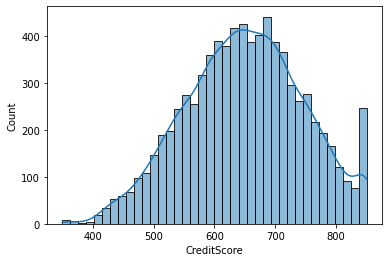

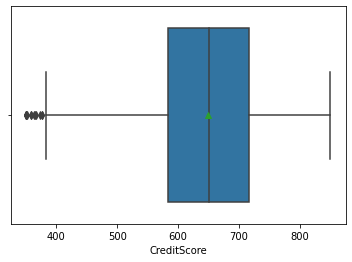

In [ ]:
# Use histplots to see distribution for CreditScore 

sns.histplot(data=X_train,x='CreditScore', kde=True)
plt.show()

sns.boxplot(data=X_train,x='CreditScore', showmeans=True)
plt.show()

In [ ]:
# Calculate quantile and IQR values for CreditScore o Train dataset 

Temp_v = 'CreditScore'
Temp_q1_CreditScore = X_train[Temp_v].quantile(0.25)
Temp_q2_CreditScore = X_train[Temp_v].quantile(0.5)
Temp_q3_CreditScore = X_train[Temp_v].quantile(0.75)
Temp_iqr_CreditScore = Temp_q3_CreditScore-Temp_q1_CreditScore

print('Median for' , Temp_v , 'is: ', Temp_q2_CreditScore)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_CreditScore)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_CreditScore)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_CreditScore, '\n')

Median for CreditScore is:  651.0
1st Quartile for CreditScore is:  583.0
3rd Quartile for CreditScore is:  717.0
IQR for CreditScore is:  134.0 



In [ ]:
# Check on lower outliers using 1.5 IQR method

Temp_lower_whisker_CreditScore = Temp_q1_CreditScore - (1.5 * Temp_iqr_CreditScore)

print('Lower Whisker for', Temp_v , 'is: ', Temp_lower_whisker_CreditScore, '\n')

print('Records below Lower Whisker in TRAIN are \n')
X_train[X_train[Temp_v] < Temp_lower_whisker_CreditScore]['CreditScore'].count()

Lower Whisker for CreditScore is:  382.0 

Records below Lower Whisker in TRAIN are 



13

In [ ]:
X_train[X_train[Temp_v] < Temp_lower_whisker_CreditScore]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8154,367,Spain,Male,42,6,93608.2800,1,1,0,168816.7300
9356,373,France,Male,42,7,0.0000,1,1,0,77786.3700
1405,359,France,Female,44,6,128747.6900,1,1,0,146955.7100
1631,350,Spain,Male,54,1,152677.4800,1,1,1,191973.4900
7,376,Germany,Female,29,4,115046.7400,4,1,0,119346.8800
1193,363,Spain,Female,28,6,146098.4300,3,1,0,100615.1400
1838,350,Germany,Male,39,0,109733.2000,2,0,0,123602.1100
8723,350,France,Male,51,10,0.0000,1,1,1,125823.7900
942,376,France,Female,46,6,0.0000,1,1,0,157333.6900
1962,358,Spain,Female,52,8,143542.3600,3,1,0,141959.1100


In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_CreditScore = PowerTransformer(method='box-cox')

# X_train[['CreditScore']] = pt_CreditScore.fit_transform(X_train[['CreditScore']])

# X_test[['CreditScore']] = pt_CreditScore.transform(X_test[['CreditScore']])

In [ ]:
sc = StandardScaler()

X_train[['CreditScore']] = sc.fit_transform(X_train[['CreditScore']])

X_test[['CreditScore']] = sc.transform(X_test[['CreditScore']])

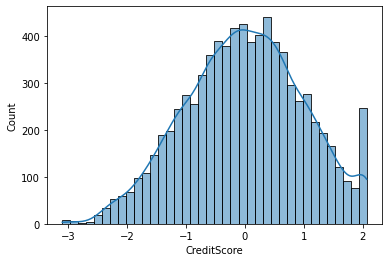

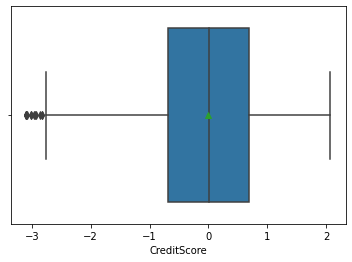

In [ ]:
# Use histplots to see distribution for CreditScore 

sns.histplot(data=X_train,x='CreditScore', kde=True)
plt.show()

sns.boxplot(data=X_train,x='CreditScore', showmeans=True)
plt.show()

CreditScore

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There were 13 lower outliers. But on review of the records, records look legit. It is possible to lower credit score, values did not look absurd.In real scenario, this would have been verified from SME / Business. Number of outliers are not significant, hence decided NOT to treat them.

* Missing values treatment - Not needed

* Feature Scaling - Done using Box-Cox

### 8a.2. Geography

In [ ]:
X_train['Geography'].value_counts()

France     4006
Germany    2004
Spain      1990
Name: Geography, dtype: int64

In [ ]:
X_train['Geography'].isnull().sum()

0

In [ ]:
# One Hot Encoding of categorical features. As there is no order in the categorical values, One Hot encoding is relevant, rather than label encoding

X_train = pd.get_dummies(X_train, columns = ['Geography'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Geography'], drop_first=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Gender             8000 non-null   object 
 2   Age                8000 non-null   int64  
 3   Tenure             8000 non-null   int64  
 4   Balance            8000 non-null   float64
 5   NumOfProducts      8000 non-null   int64  
 6   HasCrCard          8000 non-null   int64  
 7   IsActiveMember     8000 non-null   int64  
 8   EstimatedSalary    8000 non-null   float64
 9   Geography_Germany  8000 non-null   uint8  
 10  Geography_Spain    8000 non-null   uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 898.7+ KB


Geography

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - One Hot Encoding done
	
* Feature Scaling - Not needed

### 8a.3. Gender

In [ ]:
X_train['Gender'].value_counts()

Male      4363
Female    3637
Name: Gender, dtype: int64

In [ ]:
X_train['Gender'].isnull().sum()

0

In [ ]:
# One Hot Encoding of categorical features

X_train = pd.get_dummies(X_train, columns = ['Gender'], drop_first=True)

X_test = pd.get_dummies(X_test, columns = ['Gender'], drop_first=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 844.0 KB


Gender

* Datatype conversion - Not needed, this will be taken care by One Hot Encoding

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - One Hot Encoding done
	
* Feature Scaling - Not needed

### 8a.4. Age

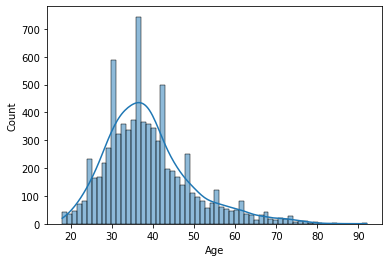

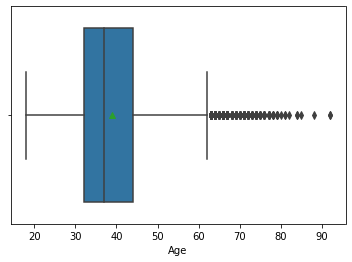

In [ ]:
# Use histplots to see distribution for Age

sns.histplot(data=X_train,x='Age', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Age', showmeans=True)
plt.show()

In [ ]:
# Calculate quantiles and IQR values for Age on X_train

Temp_v = 'Age'
Temp_q1_Age = X_train[Temp_v].quantile(0.25)
Temp_q2_Age = X_train[Temp_v].quantile(0.5)
Temp_q3_Age = X_train[Temp_v].quantile(0.75)
Temp_iqr_Age = Temp_q3_Age-Temp_q1_Age

print('Median for' , Temp_v , 'is: ', Temp_q2_Age)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Age)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Age)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Age, '\n')

Median for Age is:  37.0
1st Quartile for Age is:  32.0
3rd Quartile for Age is:  44.0
IQR for Age is:  12.0 



In [ ]:
# Check on upper outliers using 1.5 * IQR method

Temp_upper_whisker_Age = Temp_q3_Age + (1.5 * Temp_iqr_Age)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Age, '\n')

print('Records above Upper Whisker in TRAIN are \n')
X_train[X_train[Temp_v] > Temp_upper_whisker_Age][Temp_v].count()

Upper Whisker for Age is:  62.0 

Records above Upper Whisker in TRAIN are 



293

In [ ]:
# Check outliers

X_train[X_train[Temp_v] > Temp_upper_whisker_Age]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4256,-0.5566,76,9,134208.2500,1,1,1,13455.4300,0,1,0
9832,-0.5669,64,2,105736.3200,1,1,1,89935.7300,1,0,0
4010,-1.4045,66,9,0.0000,2,1,1,14234.3100,0,1,1
4241,1.4805,63,0,0.0000,2,0,1,27166.7500,0,1,1
7375,-0.1120,77,6,80926.0200,2,1,1,55829.2500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8761,-0.1637,63,10,0.0000,2,1,0,30772.8600,0,1,1
1614,-0.0913,77,9,0.0000,3,1,1,81514.0600,0,0,1
7719,0.1672,71,1,53013.2900,2,1,1,112222.6400,1,0,1
6443,1.0669,92,3,121513.3100,1,0,1,195563.9900,0,0,1


In [ ]:
# Check records over age of 85

X_train[X_train[Temp_v] > 85]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2458,-1.4149,88,10,0.0000,2,1,1,52952.2400,0,1,1
6759,0.5705,92,1,126076.2400,2,1,1,34436.8300,0,0,1
6443,1.0669,92,3,121513.3100,1,0,1,195563.9900,0,0,1


In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_Age = PowerTransformer(method='box-cox')

# X_train[['Age']] = pt_Age.fit_transform(X_train[['Age']])

# X_test[['Age']] = pt_Age.transform(X_test[['Age']])

In [ ]:
sc=StandardScaler()

X_train[['Age']] = sc.fit_transform(X_train[['Age']])

X_test[['Age']] = sc.transform(X_test[['Age']])

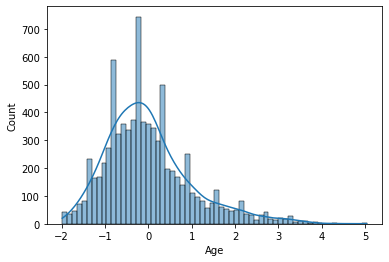

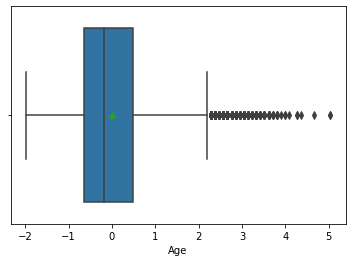

In [ ]:
# Use histplots to see distribution for Age

sns.histplot(data=X_train,x='Age', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Age', showmeans=True)
plt.show()

CreditScore

* Datatype conversion - Not needed. 

* Inorrect values treatment - Not needed. 

* Data Format / Values conversion - Not needed

* Outliers treatment - There were upper outliers. But on review of the records, most of the records look legit. Some of the customers do have age on the higher side, but its still possible. In real scenario, this would have been verified from SME / Business. Decided NOT to treat them in this case.

* Missing values treatment - Not needed

* Feature Scaling - Done using Box-Cox

### 8a.5. Tenure

In [ ]:
X_train['Tenure'].value_counts()

2     849
3     834
1     831
7     814
8     806
9     795
6     786
4     782
5     772
10    391
0     340
Name: Tenure, dtype: int64

In [ ]:
X_train['Tenure'].isnull().sum()

0

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 844.0 KB


Tenure

* Datatype conversion - Not needed

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

### 8a.6. Balance

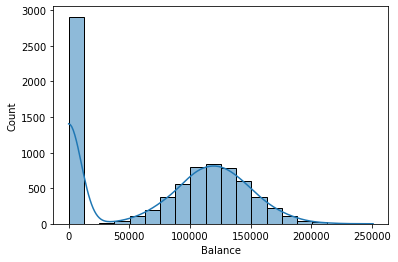

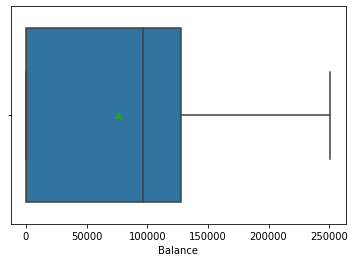

In [ ]:
# Use histplots to see distribution for Balance 

sns.histplot(data=X_train,x='Balance', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Balance', showmeans=True)
plt.show()

In [ ]:
X_train[X_train['Balance'] < 1000]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9151,-0.3705,0.9563,1,0.0000,2,1,0,192440.5400,0,0,1
4898,-1.0943,0.1029,7,0.0000,1,0,1,161076.9200,0,0,0
6427,0.9945,-0.1816,2,0.0000,2,1,0,143194.0500,0,0,1
4467,-1.1563,-0.7506,1,0.0000,2,1,0,1375.4600,0,0,1
7391,-2.2731,-0.7506,5,0.0000,1,1,0,95655.1600,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4266,-1.1770,-0.3713,8,0.0000,1,1,0,171840.2400,0,0,0
5090,-1.8181,-0.8454,9,0.0000,2,0,0,63158.2200,0,0,0
9358,1.9355,-0.9402,9,0.0000,2,1,1,41866.2600,0,0,0
451,2.0699,0.1029,9,0.0000,2,0,1,119232.3300,0,0,1


There are 2908 records with 0 account balance. 
We will treat this feature by replacing 0 values with mean for the train dataset.

In [ ]:
X_train['Balance'] = X_train['Balance'].replace(0.0000, np.nan)

X_test['Balance'] = X_test['Balance'].replace(0.0000, np.nan)

In [ ]:
X_train[X_train['Balance'] < 1000]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male


In [ ]:
X_train[X_train['Balance'].isna()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9151,-0.3705,0.9563,1,NaN,2,1,0,192440.5400,0,0,1
4898,-1.0943,0.1029,7,NaN,1,0,1,161076.9200,0,0,0
6427,0.9945,-0.1816,2,NaN,2,1,0,143194.0500,0,0,1
4467,-1.1563,-0.7506,1,NaN,2,1,0,1375.4600,0,0,1
7391,-2.2731,-0.7506,5,NaN,1,1,0,95655.1600,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4266,-1.1770,-0.3713,8,NaN,1,1,0,171840.2400,0,0,0
5090,-1.8181,-0.8454,9,NaN,2,0,0,63158.2200,0,0,0
9358,1.9355,-0.9402,9,NaN,2,1,1,41866.2600,0,0,0
451,2.0699,0.1029,9,NaN,2,0,1,119232.3300,0,0,1


In [ ]:
SI_Balance = SimpleImputer(strategy="mean")

X_train['Balance'] = SI_Balance.fit_transform(X_train[['Balance']])

X_test['Balance'] = SI_Balance.transform(X_test[['Balance']])

In [ ]:
X_train[X_train['Balance'].isna()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male


In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_Balance = PowerTransformer(method='box-cox')

# X_train[['Balance']] = pt_Balance.fit_transform(X_train[['Balance']])

# X_test[['Balance']] = pt_Balance.transform(X_test[['Balance']])

In [ ]:
sc=StandardScaler()

X_train[['Balance']] = sc.fit_transform(X_train[['Balance']])

X_test[['Balance']] = sc.transform(X_test[['Balance']])

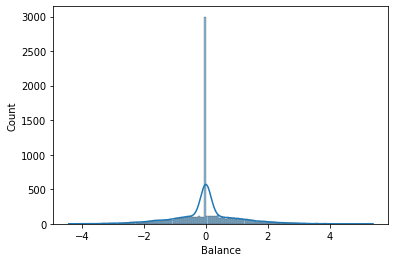

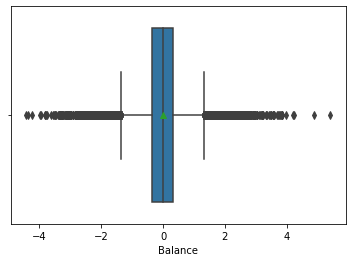

In [ ]:
# Use histplots to see distribution for Balance 

sns.histplot(data=X_train,x='Balance', kde=True)
plt.show()

sns.boxplot(data=X_train,x='Balance', showmeans=True)
plt.show()

Balance

* Datatype conversion - Not needed. 

* Inorrect values treatment - There are 2908 records with 0 account balance, which seems incorrect. We treated these by replacing with mean for X_train. To avoid Data Leakage, used the same value on test dataset. 
In the entire dataset, Over 3600 customers with 0 balance. Not sure if this is correct that these customers have no account balance. Many customers have high salaries. In real case, we will check with business / SME / source of the data and ensure that the data indeed is crrect. For this exercise, we will treat this by imputing mean values.

* Data Format / Values conversion - Not needed

* Outliers treatment - No outliers.

* Missing values treatment - Not needed

* Feature Scaling - Done using box-cox

### 8a.7. NumOfProducts

In [ ]:
X_train['NumOfProducts'].value_counts()

1    4045
2    3690
3     213
4      52
Name: NumOfProducts, dtype: int64

In [ ]:
X_train['NumOfProducts'].isnull().sum()

0

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 844.0 KB


NumOfProducts

* Datatype conversion - Not needed

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

### 8a.8. HasCrCard

In [ ]:
X_train['HasCrCard'].value_counts()

1    5627
0    2373
Name: HasCrCard, dtype: int64

In [ ]:
X_train['HasCrCard'].isnull().sum()

0

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 844.0 KB


HasCrCard

* Datatype conversion - Not needed

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

### 8a.9. IsActiveMember

In [ ]:
X_train['IsActiveMember'].value_counts()

1    4133
0    3867
Name: IsActiveMember, dtype: int64

In [ ]:
X_train['IsActiveMember'].isnull().sum()

0

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 844.0 KB


IsActiveMember

* Datatype conversion - Not needed

* Inorrect values treatment - Not needed

* Data Format / Values conversion - Not needed

* Outliers treatment - Not needed

* Missing values treatment - Not needed

* Feature Enginering - Not needed
	
* Feature Scaling - Not needed

### 8a.10. EstimatedSalary

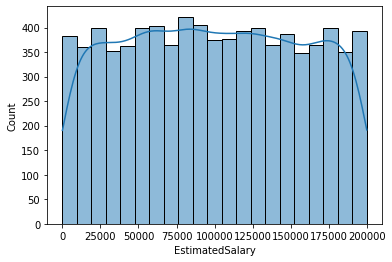

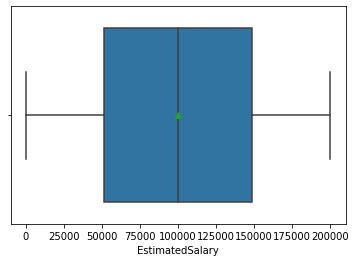

In [ ]:
# Use histplots to see distribution for EstimatedSalary 

sns.histplot(data=X_train,x='EstimatedSalary', kde=True)
plt.show()

sns.boxplot(data=X_train,x='EstimatedSalary', showmeans=True)
plt.show()

In [ ]:
X_train[X_train['EstimatedSalary'] < 10000].count()

CreditScore          406
Age                  406
Tenure               406
Balance              406
NumOfProducts        406
HasCrCard            406
IsActiveMember       406
EstimatedSalary      406
Geography_Germany    406
Geography_Spain      406
Gender_Male          406
dtype: int64

In [ ]:
X_train[X_train['EstimatedSalary'] < 10000]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4467,-1.1563,-0.7506,1,0.0000,2,1,0,1375.4600,0,0,1
5030,-0.9082,-0.5609,8,-1.1229,2,1,0,1354.2500,1,0,1
9558,-0.2774,0.6718,4,0.0000,1,1,0,5549.1100,0,1,1
7647,1.2220,-1.3195,0,-1.7113,1,1,1,8316.1900,0,0,1
4280,1.2013,2.1890,7,0.9425,1,0,1,5893.2300,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8266,-0.9289,-0.3713,1,0.0000,2,1,0,3701.6300,0,0,0
9420,0.0742,-1.0351,7,0.0000,2,0,1,5177.6200,0,0,0
7844,-0.3912,-0.0868,1,0.0000,2,1,1,9209.2100,0,0,0
7906,-0.3808,-0.1816,3,2.1359,1,0,1,5353.1200,0,1,1


In [ ]:
X_train['EstimatedSalary'] = X_train['EstimatedSalary'].apply(lambda x: np.nan if x < 10000 else x)

In [ ]:
X_train[X_train['EstimatedSalary'] < 10000]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male


In [ ]:
X_train[X_train['EstimatedSalary'].isna()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4467,-1.1563,-0.7506,1,0.0000,2,1,0,NaN,0,0,1
5030,-0.9082,-0.5609,8,-1.1229,2,1,0,NaN,1,0,1
9558,-0.2774,0.6718,4,0.0000,1,1,0,NaN,0,1,1
7647,1.2220,-1.3195,0,-1.7113,1,1,1,NaN,0,0,1
4280,1.2013,2.1890,7,0.9425,1,0,1,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8266,-0.9289,-0.3713,1,0.0000,2,1,0,NaN,0,0,0
9420,0.0742,-1.0351,7,0.0000,2,0,1,NaN,0,0,0
7844,-0.3912,-0.0868,1,0.0000,2,1,1,NaN,0,0,0
7906,-0.3808,-0.1816,3,2.1359,1,0,1,NaN,0,1,1


In [ ]:
X_train['EstimatedSalary'] = SI_Balance.fit_transform(X_train[['EstimatedSalary']])

X_test['EstimatedSalary'] = SI_Balance.transform(X_test[['EstimatedSalary']])

In [ ]:
X_train[X_train['EstimatedSalary'].isna()]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male


In [ ]:
# # Transform numeric data with PowerTransformer. This includes Standardization as well
# #PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

# pt_EstimatedSalary = PowerTransformer(method='box-cox')

# X_train[['EstimatedSalary']] = pt_EstimatedSalary.fit_transform(X_train[['EstimatedSalary']])

# X_test[['EstimatedSalary']] = pt_EstimatedSalary.transform(X_test[['EstimatedSalary']])

In [ ]:
sc = StandardScaler()

X_train[['EstimatedSalary']] = sc.fit_transform(X_train[['EstimatedSalary']])

X_test[['EstimatedSalary']] = sc.transform(X_test[['EstimatedSalary']])


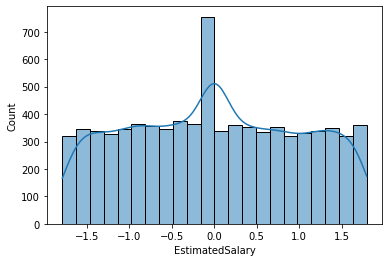

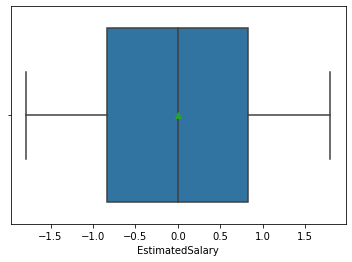

In [ ]:
# Use histplots to see distribution for EstimatedSalary 

sns.histplot(data=X_train,x='EstimatedSalary', kde=True)
plt.show()

sns.boxplot(data=X_train,x='EstimatedSalary', showmeans=True)
plt.show()

EstimatedSalary

* Datatype conversion - Not needed. 

* Inorrect values treatment - Mimimum value seems to be around 11, there are 4 records with < 100 salary, 406 records with < 10000 salary. This seems incorrct, especially when balance for the same record is significantly high. This should b confirmed with business / SME / data source. But for this exercise, we will treat only those records with less than 10000 estimated salary, replace those with mean for the train data.

* Data Format / Values conversion - Not needed

* Outliers treatment - No outliers.

* Missing values treatment - Not needed

* Feature Scaling - Done using box-cox

### Final datasets for Train and Test

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   float64
 1   Age                8000 non-null   float64
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   uint8  
 9   Geography_Spain    8000 non-null   uint8  
 10  Gender_Male        8000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 844.0 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 4466 to 8350
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   float64
 1   Age                2000 non-null   float64
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   Geography_Germany  2000 non-null   uint8  
 9   Geography_Spain    2000 non-null   uint8  
 10  Gender_Male        2000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 146.5 KB


# 10. Create ANN Models

We will expriment and create several ANN models.

For each model, we will - 
1. Create and compile the model
Hyperparameter tune the model
2. Fit the model on train data
3. Find optimal threshold value using ROC-AUC method
4. Check the loss function change with number of epochs
5. Find the performance metric values for train and test

### Model 1 - Create initial Neural Network

Create initial simple ANN model with minimal layers and number of neurons per layer.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Create ANN Model

# Initializing the ANN
model1 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer with 64 neurons
input_layer = Dense(64, input_shape=(X_train.shape[1],),activation='relu')
model1.add(input_layer)

#Add 1st hidden layer with 32 neurons
model1.add(Dense(32, activation='relu'))

# Adding the output layer
# we have an output of 1 neuron, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Defining the Adam optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model1.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[ 'accuracy'])  # Defining the loss function, optimizer and metrices 

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


Total number of weights and biases for the model are 2881.

In [ ]:
# Fit the model using 50 epochs

history1=model1.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.4611 - accuracy: 0.8005 - val_loss: 0.4344 - val_accuracy: 0.8081
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4213 - accuracy: 0.8164 - val_loss: 0.4238 - val_accuracy: 0.8225
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4087 - accuracy: 0.8272 - val_loss: 0.4177 - val_accuracy: 0.8294
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8302 - val_loss: 0.4136 - val_accuracy: 0.8281
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8323 - val_loss: 0.4281 - val_accuracy: 0.8281
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8388 - val_loss: 0.4109 - val_accuracy: 0.8338
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8356 - val_loss: 0.3993 - val_accuracy: 0.8419
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8560


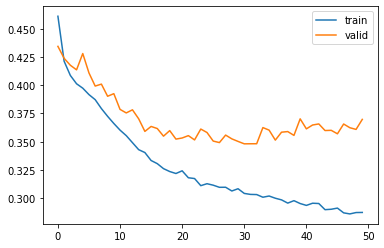

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model1.evaluate(X_test, y_test)

Looks like model is overfitting as the loss for train and test started to go apart.

Let's check the model performance using threshold = 0.5. That is if the prediction is > 0.5, then its considered as 1.

In [ ]:
y_pred1=model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

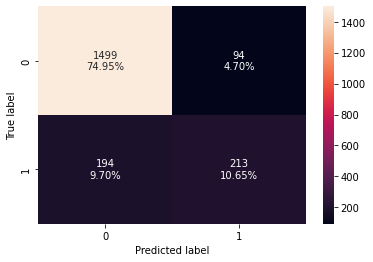

In [ ]:
# Confusion matrix with 0.5 threshold

confusion_matrix_sklearn_with_threshold(model1, X_test, y_test, 0.5)

In [ ]:
#Accuracy as per the classification report 

cr=metrics.classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.52      0.60       407

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# Check metrics with threshold 0.5 on Train data

model_performance_classification_sklearn_with_threshold(model1, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.8814,0.6123,0.7589,0.6778


In [ ]:
# Check metrics with threshold 0.5 on Test data

model_performance_classification_sklearn_with_threshold(model1, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.8560,0.5233,0.6938,0.5966


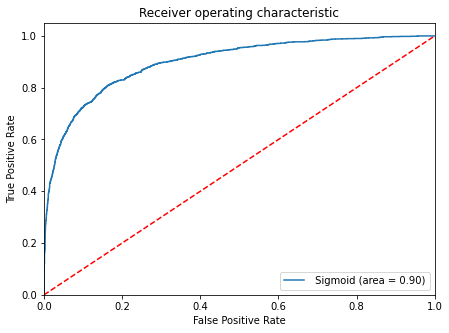

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model1_roc_auc_train = roc_auc_score(y_train, model1.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, model1.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=" Sigmoid (area = %0.2f)" % model1_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Let's find optimal threshold using roc_curve.

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, model1.predict(X_train))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc1 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc1)

0.21806765


In [ ]:
# checking model performance for this model on TRAIN, using the optimal threshold

model1_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model1, X_train, y_train, threshold=optimal_threshold_auc_roc1
)
print("Training performance:")
model1_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8311,0.8086,0.5592,0.6611


In [ ]:
# checking model performance for this model on TEST, using the optimal threshold

model1_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model1, X_test, y_test, threshold=optimal_threshold_auc_roc1
)
print("TEST set performance:")
model1_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.7785,0.7076,0.4706,0.5653


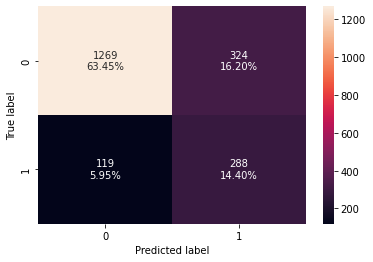

In [ ]:
# Plot confusion matrix

confusion_matrix_sklearn_with_threshold(model1, X_test, y_test, optimal_threshold_auc_roc1)

F1 score for the Test dataset is 0.5598, Recall is better 0.6437.
With each execution though, numbers do change. 

### Model2 - ANN with increased number of hidden layers

Let's increase the number of layers / neurons now.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model2 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model2.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))

#Add hidden layers
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))

# Adding the output layer
# we have an output of 1 node, which is the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model2.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Defining the optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[ 'accuracy'])  # Defining the loss function, optimizer and metrices 

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model with 50 Epochs

history2=model2.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 9ms/step - loss: 0.4707 - accuracy: 0.7998 - val_loss: 0.4310 - val_accuracy: 0.8094
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.4181 - accuracy: 0.8214 - val_loss: 0.4403 - val_accuracy: 0.8112
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4063 - accuracy: 0.8233 - val_loss: 0.4302 - val_accuracy: 0.8156
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3935 - accuracy: 0.8342 - val_loss: 0.4057 - val_accuracy: 0.8338
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3828 - accuracy: 0.8391 - val_loss: 0.3891 - val_accuracy: 0.8331
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3764 - accuracy: 0.8430 - val_loss: 0.4000 - val_accuracy: 0.8363
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3630 - accuracy: 0.8467 - val_loss: 0.3735 - val_accuracy: 0.8519
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.8246 - accuracy: 0.8260


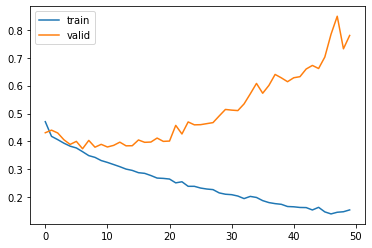

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model2.evaluate(X_test, y_test)

Again, model is overfit. We will try to use Regularization techniques to create subsequent models.

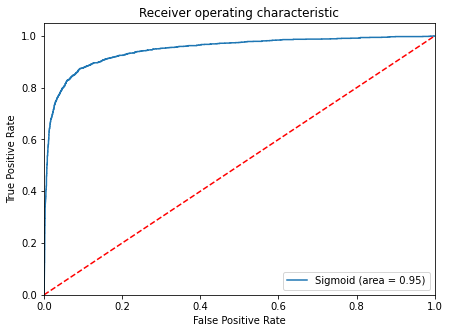

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model2_roc_auc_train = roc_auc_score(y_train, model2.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, model2.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model2_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, model2.predict(X_train))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc2 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc2)

0.16372639


In [ ]:
# checking model performance for this model on TRAIN

model2_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model2, X_train, y_train, threshold=optimal_threshold_auc_roc2
)
print("Training performance:")
model2_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.9012,0.8736,0.7092,0.7828


In [ ]:
# checking model performance for this model on TEST
model2_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model2, X_test, y_test, threshold=optimal_threshold_auc_roc2
)
print("TEST set performance:")
model2_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.7810,0.6241,0.4712,0.5370


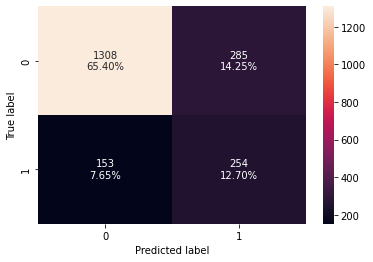

In [ ]:
confusion_matrix_sklearn_with_threshold(model2, X_test, y_test, optimal_threshold_auc_roc2)

Model seems overfit. F1 score on Test has actually gone down. For subsequent models, we will use lesser number of epochs, may be model is getting over trained. 'Early Stopping' may help.

### Model3 - ANN with same number of hidden layers in Model1, with Batch Normalization

We will use Batch Normalization technique after each hidden layer to see if that helps with overfitting.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model3 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model3.add(Dense(64, input_shape=(X_train.shape[1],),activation='relu'))
model3.add(BatchNormalization())

# Add hidden layers
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())

# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model3.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Defining the optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[ 'accuracy'])  # Defining the loss function, optimizer and metrices 

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,265
Trainable params: 3,073
Non-trainabl

In [ ]:
history3=model3.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=1)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.5506 - accuracy: 0.7317 - val_loss: 0.4545 - val_accuracy: 0.8106
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.8214 - val_loss: 0.4111 - val_accuracy: 0.8244
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8363 - val_loss: 0.3996 - val_accuracy: 0.8356
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8394 - val_loss: 0.3871 - val_accuracy: 0.8425
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8492 - val_loss: 0.3730 - val_accuracy: 0.8431
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3585 - accuracy: 0.8536 - val_loss: 0.3739 - val_accuracy: 0.8438
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3490 - accuracy: 0.8555 - val_loss: 0.3879 - val_accuracy: 0.8306
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8485


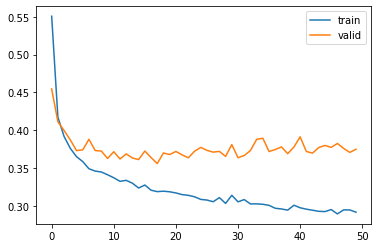

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model3.evaluate(X_test, y_test)

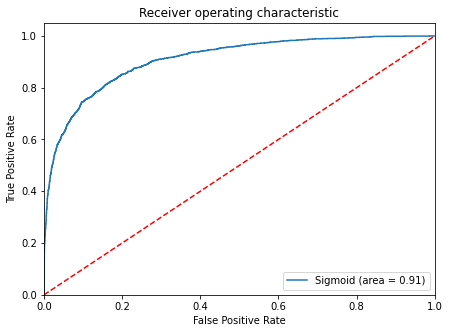

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model3_roc_auc_train = roc_auc_score(y_train, model3.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, model3.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model3_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, model3.predict(X_test))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc3 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc3)

0.28156358


In [ ]:
# checking model performance for this model on TRAIN

model3_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model3, X_train, y_train, threshold=optimal_threshold_auc_roc3
)
print("Training performance:")
model3_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8545,0.7669,0.6146,0.6823


In [ ]:
# checking model performance for this model on TEST
model3_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model3, X_test, y_test, threshold=optimal_threshold_auc_roc3
)
print("TEST set performance:")
model3_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.8075,0.6634,0.5212,0.5838


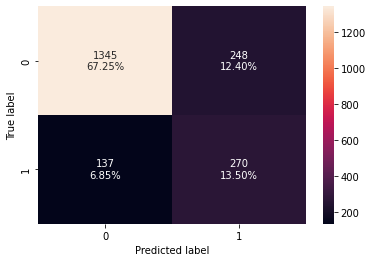

In [ ]:
confusion_matrix_sklearn_with_threshold(model3, X_test, y_test, optimal_threshold_auc_roc3)

### Model4 - ANN with same number of hidden layers in Model1, with Dropout

Now we will use another regularization technique - dropout.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model4 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model4.add(Dense(64, input_shape=(X_train.shape[1],),activation='relu'))

# Added dropout at 20%
model4.add(Dropout(0.2))

# Add hidden layers
model4.add(Dense(32, activation='relu'))
# Added dropout at 20%
model4.add(Dropout(0.2))

# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model4.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Defining the optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[ 'accuracy'])  # Defining the loss function, optimizer and metrices 

In [ ]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4=model4.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

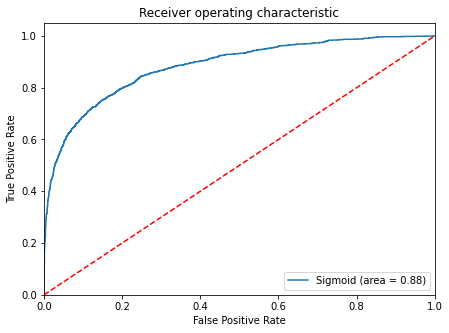

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model4_roc_auc_train = roc_auc_score(y_train, model4.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, model4.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model4_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, model4.predict(X_train))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc4 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc4)

0.2040509


In [ ]:
# checking model performance for this model on TRAIN

model4_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model4, X_train, y_train, threshold=optimal_threshold_auc_roc4
)
print("Training performance:")
model4_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8313,0.7521,0.5645,0.6449


In [ ]:
# checking model performance for this model on TEST
model4_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model4, X_test, y_test, threshold=optimal_threshold_auc_roc4
)
print("TEST set performance:")
model4_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.8080,0.7101,0.5207,0.6008


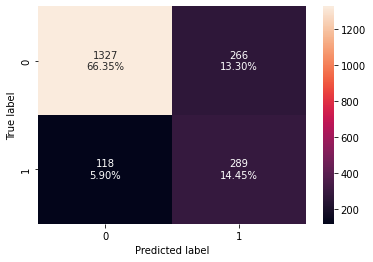

In [ ]:
confusion_matrix_sklearn_with_threshold(model4, X_test, y_test, optimal_threshold_auc_roc4)

### Model5 -  ANN with same number of hidden layers in Model1, with Dropout and Batch Normalization


In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model5 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model5.add(Dense(64, input_shape=(X_train.shape[1],),activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

# Add hidden layers
model5.add(Dense(32, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes

initial_bias = np.log([80/20])
output_bias = tf.keras.initializers.Constant(initial_bias)
model5.add(Dense(1, activation = 'sigmoid',bias_initializer=output_bias)) 

In [ ]:
# Defining the optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model5.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[ 'Recall'])  # Defining the loss function, optimizer and metrices 

In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [ ]:
history5=model5.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

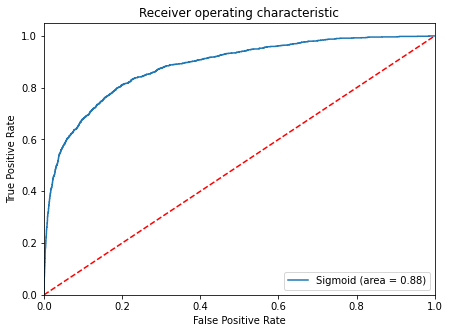

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model5_roc_auc_train = roc_auc_score(y_train, model5.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, model5.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model5_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, model5.predict(X_train))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc5 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc5)

0.18415555


In [ ]:
# checking model performance for this model on TRAIN

model5_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model5, X_train, y_train, threshold=optimal_threshold_auc_roc5
)
print("Training performance:")
model5_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8091,0.8000,0.5206,0.6307


In [ ]:
# checking model performance for this model on TEST
model5_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model5, X_test, y_test, threshold=optimal_threshold_auc_roc5
)
print("TEST set performance:")
model5_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.7730,0.7445,0.4640,0.5717


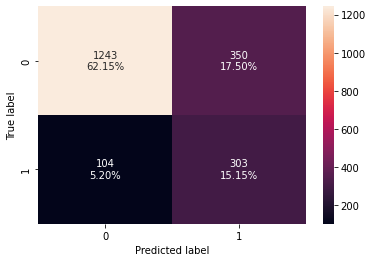

In [ ]:
confusion_matrix_sklearn_with_threshold(model5, X_test, y_test, optimal_threshold_auc_roc5)

<b> Here is a comparison of models buit so far -

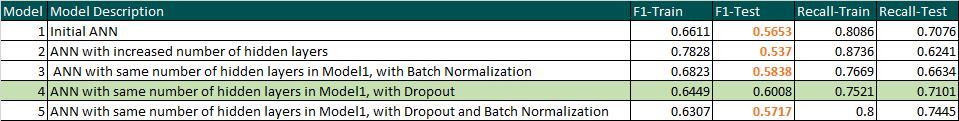

<b> Based on the above, Model4 (ANN with same number of hidden layers in Model1, with Dropout) has the best F1 score. We will use this model and try to tune it further.

### Model6 - ANN with hyperparameter tuning with RandomizedSearchCV

Let's try to use RandomizedSearchCV for hyperparameter tuning using model4.


In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model6(lr,batch_size):  
    model6 = Sequential()
    
    model6.add(Dense(64, input_shape=(X_train.shape[1],),activation='relu'))
    model6.add(Dropout(0.2))
    
    model6.add(Dense(32, activation='relu'))
    model6.add(Dropout(0.2))
    
    model6.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model6.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model6   

In [ ]:
keras_estimator6 = KerasClassifier(build_fn=create_model6, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128, 256],
    "lr":[0.01,0.1,0.001],
    }

kfold_splits = 3
random6= RandomizedSearchCV(estimator=keras_estimator6,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result6 = random6.fit(X_train, y_train,validation_split=0.2,verbose=0) 

# Summarize results
print("Best: %f using %s" % (random_result6.best_score_, random_result6.best_params_))
means = random_result6.cv_results_['mean_test_score']
stds = random_result6.cv_results_['std_test_score']
params = random_result6.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best: 0.814750 using {'lr': 0.01, 'batch_size': 32}


In [ ]:
estimator6=create_model6(batch_size=random_result6.best_params_['batch_size'],lr=random_result6.best_params_['lr'])

estimator6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result6.best_params_['lr'])
estimator6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history6=estimator6.fit(X_train, y_train, epochs=50, batch_size=random_result6.best_params_['batch_size'], verbose=0,validation_split=0.2)

63/63 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8545


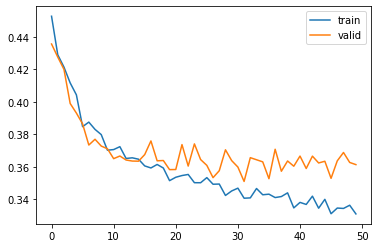

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = estimator6.evaluate(X_test, y_test)

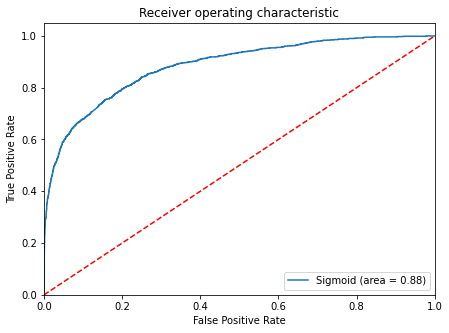

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model6_roc_auc_train = roc_auc_score(y_train, estimator6.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, estimator6.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model6_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, estimator6.predict(X_test))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc6 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc6)

0.22469115


In [ ]:
# checking model performance for this model on TRAIN

model6_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    estimator6, X_train, y_train, threshold=optimal_threshold_auc_roc6
)
print("Training performance:")
model6_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8336,0.7288,0.5720,0.6409


In [ ]:
# checking model performance for this model on TEST
model6_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    estimator6, X_test, y_test, threshold=optimal_threshold_auc_roc6
)
print("TEST set performance:")
model6_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.8120,0.6806,0.5296,0.5957


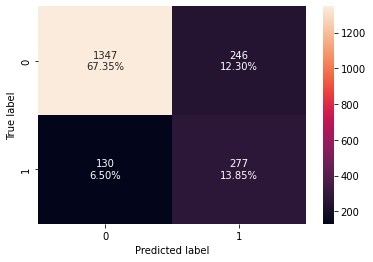

In [ ]:
confusion_matrix_sklearn_with_threshold(estimator6, X_test, y_test, optimal_threshold_auc_roc6)

### Model7 - ANN with hyperparameter tuning with GridSearchCV

Let's use model4 and try to tune hypermarameters of learning rate and batch size. Let's use dropout ration of 0.25 to see if that helps with overfitting.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model7(lr,batch_size):  
    model7 = Sequential()
    
    model7.add(Dense(64, input_shape=(X_train.shape[1],),activation='relu'))
    model7.add(Dropout(0.3))
    
    model7.add(Dense(32, activation='relu'))
    model7.add(Dropout(0.3))
    
    model7.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model7.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model7

In [ ]:
keras_estimator7 = KerasClassifier(build_fn=create_model7, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128,256],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid7 = GridSearchCV(estimator=keras_estimator7,  
                    verbose=0,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
import time
  
# store starting time
begin = time.time()


grid_result7 = grid7.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result7.best_score_, grid_result7.best_params_))
means = grid_result7.cv_results_['mean_test_score']
stds = grid_result7.cv_results_['std_test_score']
params = grid_result7.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

200/200 [==============================] - 1s 3ms/step - loss: 0.4650 - accuracy: 0.7964 - val_loss: 0.4509 - val_accuracy: 0.8213
Best: 0.808375 using {'batch_size': 32, 'lr': 0.01}
Total runtime of the program is 36.865081548690796


In [ ]:
estimator7=create_model7(batch_size=grid_result7.best_params_['batch_size'],lr=grid_result7.best_params_['lr'])

estimator7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(grid_result7.best_params_['lr'])
estimator7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history7=estimator7.fit(X_train, y_train, epochs=50, batch_size = grid_result7.best_params_['batch_size'], verbose=0,validation_split=0.2)

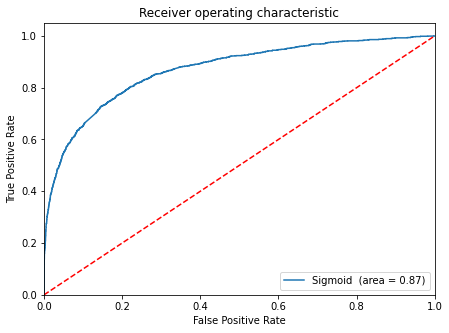

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model7_roc_auc_train = roc_auc_score(y_train, estimator7.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, estimator7.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid  (area = %0.2f)" % model7_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, estimator7.predict(X_train))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc7 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc7)

0.19797498


In [ ]:
# checking model performance for this model on TRAIN

model7_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    estimator7, X_train, y_train, threshold=optimal_threshold_auc_roc7
)
print("Training performance:")
model7_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8046,0.7699,0.5137,0.6163


In [ ]:
# checking model performance for this model on TEST
model7_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    estimator7, X_test, y_test, threshold=optimal_threshold_auc_roc7
)
print("TEST set performance:")
model7_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.7815,0.7224,0.4757,0.5737


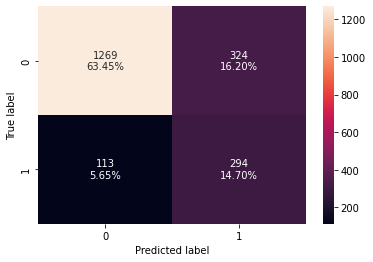

In [ ]:
confusion_matrix_sklearn_with_threshold(estimator7, X_test, y_test, optimal_threshold_auc_roc7)

### Model8 - ANN with hyperparameter tuning with Keras Tuner

Now, lets try to use Keras Tuner to find out optimal values for hyperparameters below - 
* Number of hidden layers
* Number of neurons in each hidden layer?
* Learning Rate

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Hyperparameters is the input to the function
# Number of layers tried are from 2 to 9
# Number of neurons tried are from 32 to 256, in the increment of 32
# learning rates tried are 0.01,0.001, 0.0001

def build_model8(h):
    model8 = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model8.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model8.add(layers.Dense(1, activation='sigmoid'))
    model8.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model8

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [ ]:
tuner8 = RandomSearch(
    build_model8,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Bank Churn Prediction')

In [ ]:
# Shows the overall conditions in which search is being made

tuner8.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
### Searching the best model on X and y train
tuner8.search(X_train, y_train,
             epochs=50,
             validation_split = 0.2)

In [ ]:
## Printing the best models with their hyperparameters
tuner8.results_summary()

Results summary
Results in ./Bank Churn Prediction
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8612500031789144
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.859374980131785
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8589583237965902
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8579166730244955
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model8 = Sequential()
model8.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model8.add(Dropout(0.2))
model8.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dropout(0.2))
model8.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dropout(0.2))
model8.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dropout(0.2))
model8.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dropout(0.2))
model8.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 96)                6240      
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 96)                9312      
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_3 (Dense)             (None, 224)               2

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history8 = model8.fit(X_train,y_train,epochs=50,verbose=0,validation_split = 0.2)

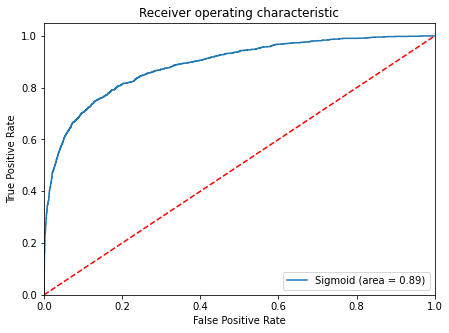

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model8_roc_auc_train = roc_auc_score(y_train, model8.predict(X_train))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, model8.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model8_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, model8.predict(X_train))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc8 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc8)

0.21713844


In [ ]:
# checking model performance for this model on TRAIN

model8_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model8, X_train, y_train, threshold=optimal_threshold_auc_roc8
)
print("Training performance:")
model8_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8448,0.7485,0.5945,0.6627


In [ ]:
# checking model performance for this model on TEST
model8_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model8, X_test, y_test, threshold=optimal_threshold_auc_roc8
)
print("TEST set performance:")
model8_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.8145,0.6757,0.5350,0.5972


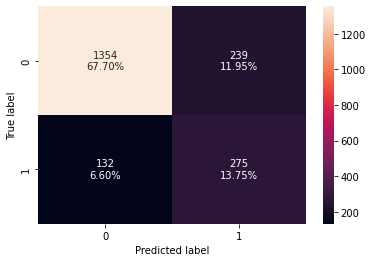

In [ ]:
confusion_matrix_sklearn_with_threshold(model8, X_test, y_test, optimal_threshold_auc_roc8)

### Model9 - ANN with hyperparameter tuning with Keras Tuner + SMOTE Oversampling

As the dataset is imbalanced (Class 0=80% , Class 1 = 20%), let's use SMOTE oversampling to see if that helps.

In [ ]:
X_train.count()

CreditScore          8000
Age                  8000
Tenure               8000
Balance              8000
NumOfProducts        8000
HasCrCard            8000
IsActiveMember       8000
EstimatedSalary      8000
Geography_Germany    8000
Geography_Spain      8000
Gender_Male          8000
dtype: int64

In [ ]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [ ]:
##Applying SMOTE on train

smote=SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
X_sm.count()

CreditScore          12740
Age                  12740
Tenure               12740
Balance              12740
NumOfProducts        12740
HasCrCard            12740
IsActiveMember       12740
EstimatedSalary      12740
Geography_Germany    12740
Geography_Spain      12740
Gender_Male          12740
dtype: int64

In [ ]:
y_sm.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model9(h):
    model9 = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model9.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
        model9.add(Dropout(0.2))
    model9.add(layers.Dense(1, activation='sigmoid'))
    model9.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model9

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.


In [ ]:
tuner9 = RandomSearch(
    build_model9,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [ ]:
tuner9.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
### Searching the best model on X and y train
tuner9.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

In [ ]:
## Printing the best models with their hyperparameters
tuner9.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8261381586392721
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.7662218610445658
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.755886971950531
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.7192569375038147
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
unit

* Let's create a model with the above mentioned best configuration given by Keras Tuner.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_sm.shape[1]))
model9.add(Dropout(0.2))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dropout(0.2))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dropout(0.2))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dropout(0.2))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dropout(0.2))
model9.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dropout_2 (Dropout)         (None, 224)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               2

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history9 = model9.fit(X_sm,y_sm,epochs=50,verbose=0,validation_split = 0.2)

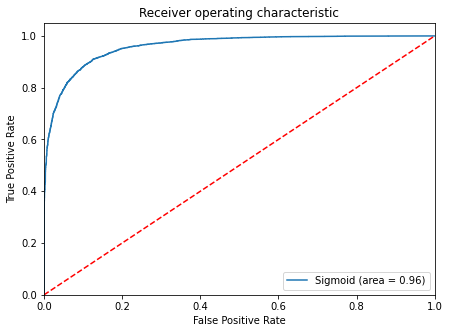

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model9_roc_auc_train = roc_auc_score(y_sm, model9.predict(X_sm))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_sm, model9.predict(X_sm))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model9_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_sm, model9.predict(X_sm))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc9 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc9)

0.37643754


In [ ]:
# checking model performance for this model on TRAIN

model9_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model9, X_sm, y_sm, threshold=optimal_threshold_auc_roc9
)
print("Training performance:")
model9_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8923,0.9099,0.8790,0.8942


In [ ]:
# checking model performance for this model on TEST
model9_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model9, X_test, y_test, threshold=optimal_threshold_auc_roc9
)
print("TEST set performance:")
model9_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.7710,0.6781,0.4577,0.5465


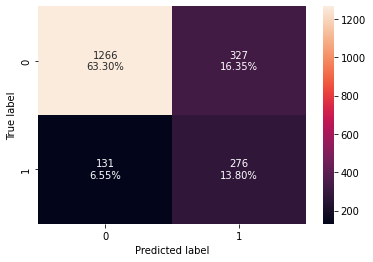

In [ ]:
confusion_matrix_sklearn_with_threshold(model9, X_test, y_test, optimal_threshold_auc_roc9)

### Model10 - Model4 ANN model with SMOTE Oversampling

Model4 still gave the best F1 score so far. So, let's try that model with oversampled data.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model10 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model10.add(Dense(64, input_shape=(X_sm.shape[1],),activation='relu'))

# Added dropout at 20%
model10.add(Dropout(0.2))

# Add hidden layers
model10.add(Dense(32, activation='relu'))
# Added dropout at 20%
model10.add(Dropout(0.2))

# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model10.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Defining the optimizer with default learning rate
optimizer = tf.keras.optimizers.Adam()

# Compiling the model
model10.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=[ 'accuracy'])  # Defining the loss function, optimizer and metrices 

In [ ]:
model10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history10=model10.fit(X_sm, y_sm, validation_split=0.2, epochs=50, verbose=0)

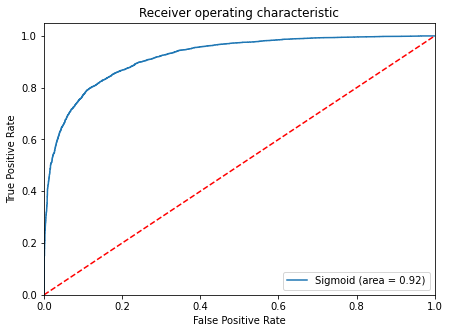

In [ ]:
# This function roc_auc_score provides AUC value for the Train set. More AUC better the model

model10_roc_auc_train = roc_auc_score(y_sm, model10.predict(X_sm))

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_sm, model10.predict(X_sm))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Sigmoid (area = %0.2f)" % model10_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_sm, model10.predict(X_sm))

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc10 = thresholds[optimal_idx]

print(optimal_threshold_auc_roc10)

0.46139964


In [ ]:
# checking model performance for this model on TRAIN

model10_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model10, X_sm, y_sm, threshold=optimal_threshold_auc_roc10
)
print("Training performance:")
model10_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8406,0.7975,0.8727,0.8334


In [ ]:
# checking model performance for this model on TEST
model10_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    model10, X_test, y_test, threshold=optimal_threshold_auc_roc10
)
print("TEST set performance:")
model10_test_perf_threshold_auc_roc

TEST set performance:


,Accuracy,Recall,Precision,F1
0,0.8120,0.6560,0.5308,0.5868


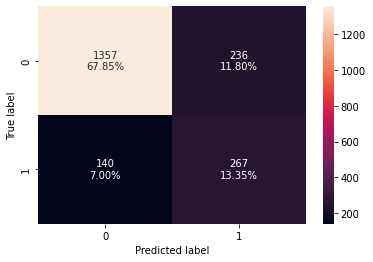

In [ ]:
confusion_matrix_sklearn_with_threshold(model10, X_test, y_test, optimal_threshold_auc_roc10)

# 11. <b><font color="blue">Model Performance Evaluation</b>

We created 10 ANN models so far. Below is a summary of all - 

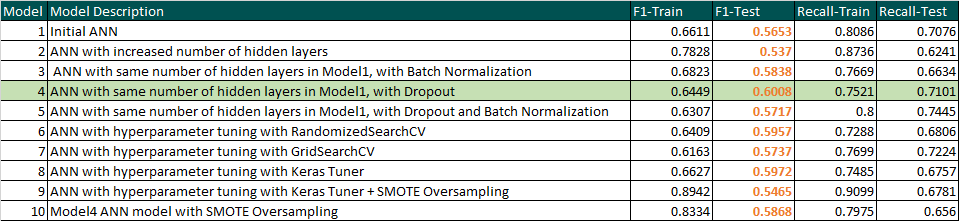

Model4 (Smaller number of layers with Dropout) gave the best performance on the performance metrics that's important in this case (F1 Score). Recall on the test data (reducing False Negatives, customers that will exit but model does not identify them) is good as well. Hence, Model4 is the recommended model.


Below things can be exprimented to improve the model performance further - 

1. Improve data quality and quantity - If available, get more customer records. Improve data quality by ensuring that records are complete (no missing values), correct (no incorrect values like 0 account balances), more independent features that may have impact on customer decision.

2. Exprimentations & Hyperparameter tuning - More expriments and hyperparameter tuning can be done to identify optimal values for - 
  * Number of Layers
  * Number of Neurons in a layer
  * Regularization hyperparameters
  * Weight initializations techniques
  * Learning Rate
  * Type of Optimizer
  * Dropout Rate

3. Create ML Classification models to verify their results and recommendations as well as feature importances.

# 14. <b><font color="blue">Actionable Insights & Recommendations</b>

1. Use profile of customers who exited and concentrate on customers with those characteristics = 
* About 20% customers have exited
* Of customers who have exited - 

  * Proportion of male customers exiting is more than females

  * Most used 1 number of products

  * Most used credit card

  * Most were NOT active

  * Comparatively older by age customers

2. Use the model in Production to predict customers that will exit. Based on the quality of results, fine tune the model. 

3. Actions for customers at risk of exit -
  * Pay attention to the customers who get inactive, that may indicate risk of losing the customer

  * Survey and identify any specific reasons why male customers are more prone to exiting

  * Survey any specific requirements for older customers and address those issues

  * In terms of numbers, most number of customers exited used 1 product. However, in terms of proportion, customers using 3 and 4 products have large proportion who have exited. 

  * Disproportionate number of customers have exited from France and Spain, as compared to Germany. Assess how service can b improved in those countries

4. Work with business to improve the data quantity and quality. With that and based on model results in production, continue model optimizations.